In [1]:
import os
from os.path import join
import sys
sys.path.insert(0, "/opt/src")
from dfba import DfbaModel, ExchangeFlux, KineticVariable, ControlParameter
from plotly import graph_objects as go
from functools import partial
from dfba.plot.plotly import *
from gsmmutils.experimental.ExpMatrix import *
from gsmmutils.model.COBRAmodel import MyModel
from results_analysis import plot_caros
import sympy as sp
from sympy import Max, Min
from sympy.functions import Abs
import json
from joblib import Parallel
import numbers
import matplotlib.pyplot as plt
from main import *
from results_analysis import *

Loading

Reactions: 3638
Metabolites: 3676
Genes: 1700
Model loaded


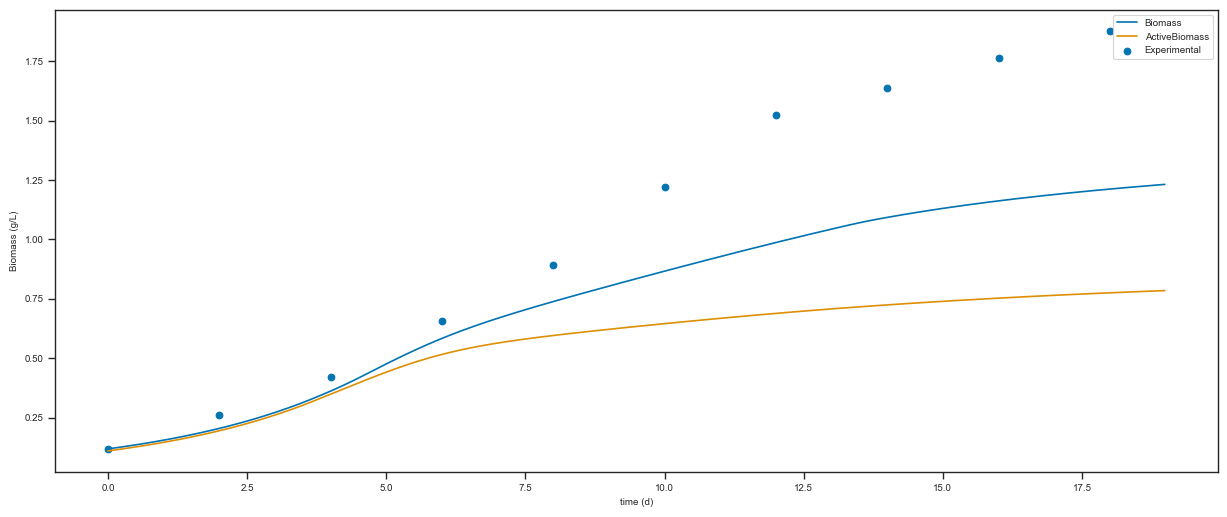

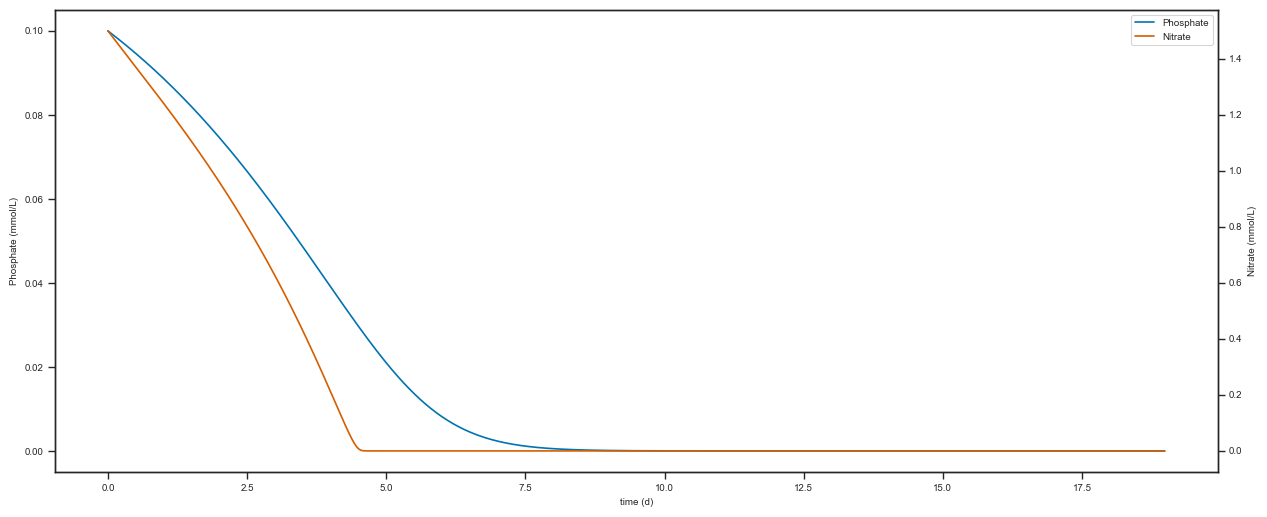

In [2]:
lut_exp_tc = {4: 0.003536932, 8:0.004008158,
                    12: 0.004144134,  16:0.003374838}
lut_exp_sc = {4: 0.002943876
, 8: 0.001903962
, 10: 0.002526625
, 12: 0.001929135
, 14: 0.001478111
}
chl_sc = {4: 0.005994556, 8: 0.005155043, 10: 0.00599604, 12: 0.004537865, 14: 0.003939947}
chl_tc = {4: 0.006979269, 8: 0.011705649, 12: 0.0112052, 16: 0.008487263}
chl_sc_conc = {4: 0.005994556, 8: 0.005155043, 10: 0.00599604, 12: 0.004537865, 14: 0.003939947}
# initial_parameters = json.load(open(f"/home/ecunha/dynamic_model/data/parameters/initial_parameters.json", "r"))
# initial_parameters = json.load(open(f"/home/ecunha/dynamic_model/data/parameters/initial_parameters_backup.json", "r"))
initial_parameters = json.load(open(f"{RESULTS_PATH}/parameters/optimized_parameters.json", "r"))
# initial_parameters["smoothing_factor_lut"] = 1
# initial_parameters["v_lut_max"] = 0.004
# initial_parameters["a0_lut"] = 0.001
# initial_parameters["a1_lut"] = 7e-5
# initial_parameters["a0p_lut"] = 0.08
# initial_parameters["smoothing_factor_lut_p"] = 5000
# initial_parameters["Kaeration"] = 900
# initial_parameters["chl_aeration_exponent"] = 2.5
# ## initial_parameters["wPmin"] = 0.20>
# # initial_parameters["v_polyphosphate_max"] = 0.0001
# initial_parameters["KPm"] = 0.06  #0.024
# initial_parameters["VPmax"] = 0.5
# initial_parameters["KPm"] = 0.004
# initial_parameters["wNmin"] = 0.43
# initial_parameters["Esat"] = 75
# initial_parameters["KEchl"] = 18
# initial_parameters["ymax"] = 1.2
# initial_parameters["a0chlp"] = 0.0065
# initial_parameters["smoothing_factor_chl_p"] = 4000
# initial_parameters["VNmax"] = 11.96
# initial_parameters["KNm"] = 0.02
# initial_parameters['maximum_tag_production'] = 0.10
# initial_parameters['t_max'] = 1.5
# initial_parameters["v_car_max"] = 0.0009
# initial_parameters["smoothing_factor_p"] = 4000
# initial_parameters["ExA_lut"] = 60
# initial_parameters["Kaeration_lut"] = 704
# initial_parameters["Kaeration_lut"] = 707

# concentrations_tc, trajectories_tc = create_dfba_model("TC", initial_parameters, True)

# matrix.conditions.loc["TC", "[P] mmol"] = 0.05
# # matrix.conditions.loc["TC", "[N] mmol"] = 2
# # matrix.conditions.loc["TC", "Aeration rate"] = 500
# concentrations_tc_05, trajectories_tc = create_dfba_model("TC", initial_parameters, True)

matrix.conditions.loc["OC", "[P] mmol"] = 0.10
matrix.conditions.loc["OC", "[N] mmol"] = 1.5
# # matrix.conditions.loc["TC", "Aeration rate"] = 500
concentrations_tc_15, trajectories_tc = create_dfba_model("OC", initial_parameters, True)
# concentrations_sc, trajectories_sc = create_dfba_model("SC", initial_parameters, True)

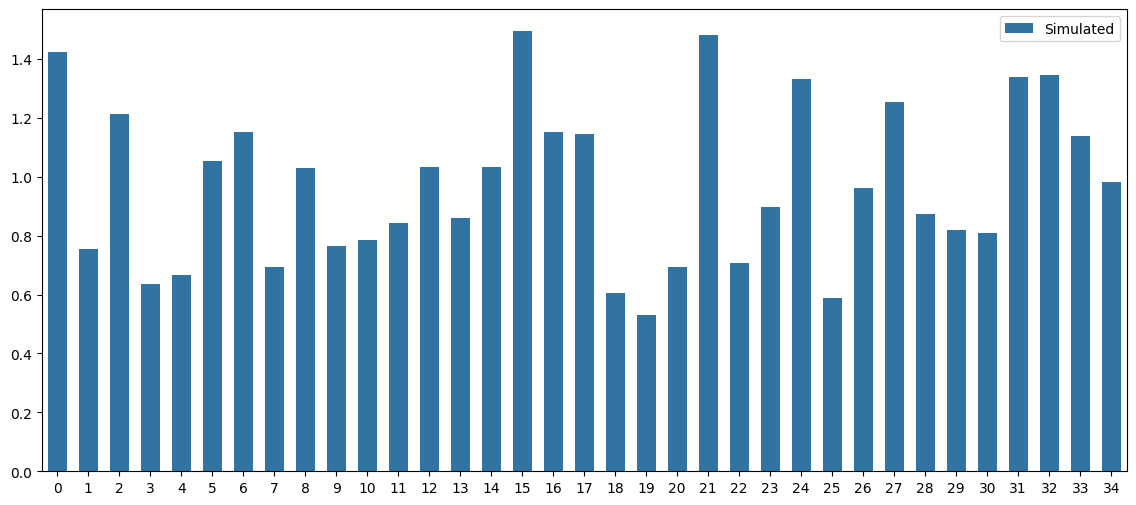

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Example data

trials = np.arange(35)  # 35 trials
simulated = np.random.uniform(0.5, 1.5, 35)  # Simulated values (bars)
experimental = np.random.uniform(0.5, 1.5, 35)  # Experimental values (dots)
exp_error = np.random.uniform(0.05, 0.2, 35)  # Random error values (replace with actual)

plt.figure(figsize=(14, 6))

# Bar plot for simulated values
sns.barplot(x=trials, y=simulated, width=0.6, label='Simulated')

# # Scatter plot (dots) for experimental values with error bars
# plt.errorbar(trials, experimental, yerr=exp_error, fmt='o',  color="#DD8452",
#              ecolor='black', capsize=4, label='Experimental', zorder=3)

# plt.xticks(trials, trials, rotation=45)
# plt.xlabel('Trials')
# plt.ylabel('Values')
# plt.legend()
# plt.title('Experimental (Dots + Error Bars) vs Simulated (Bars)')
# plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [24]:
concentrations_tc_15[["Carotene", "Carotene_concentration"]].iloc[-1]*1000 ## 1.89, 2.35   1.69, 3.43

Carotene                  1.697586
Carotene_concentration    3.427735
Name: 911, dtype: float64

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

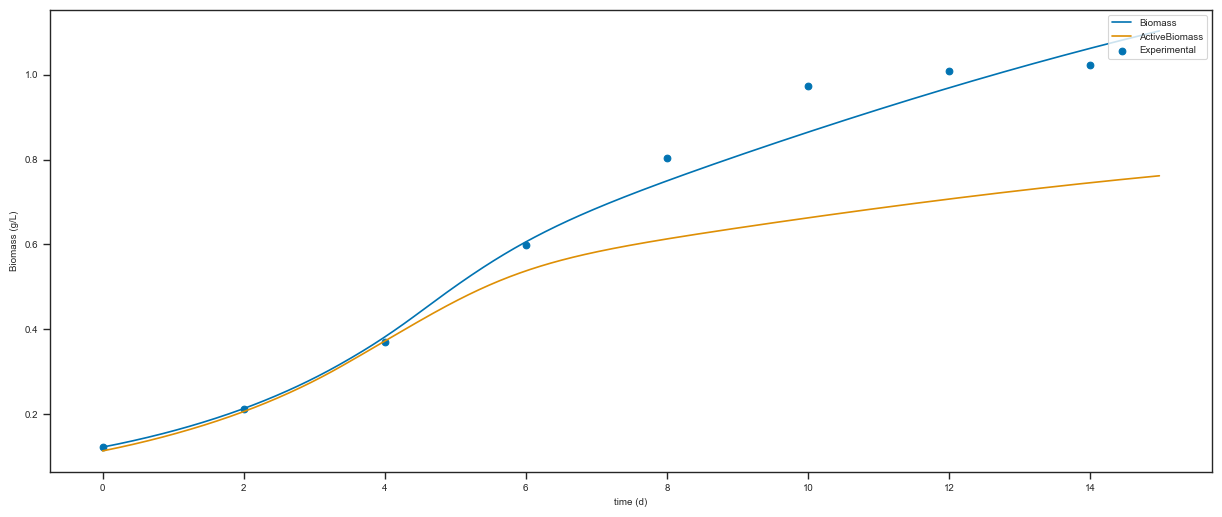

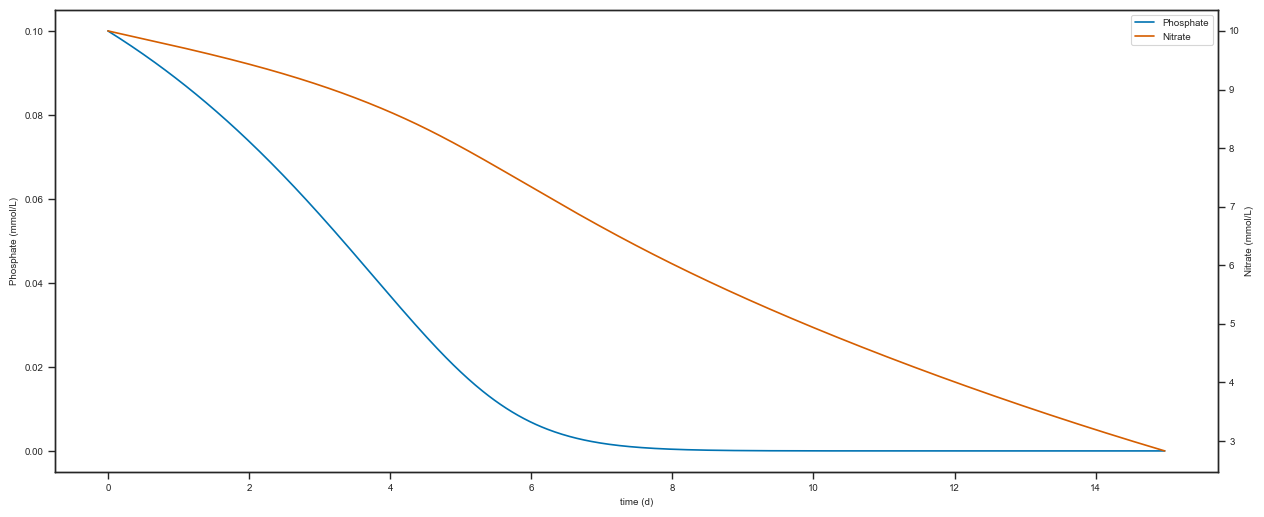

In [16]:
# initial_parameters["wNmax"] = 7.5
concentrations_n2, trajectories_n2 = create_dfba_model("SC", initial_parameters, True)

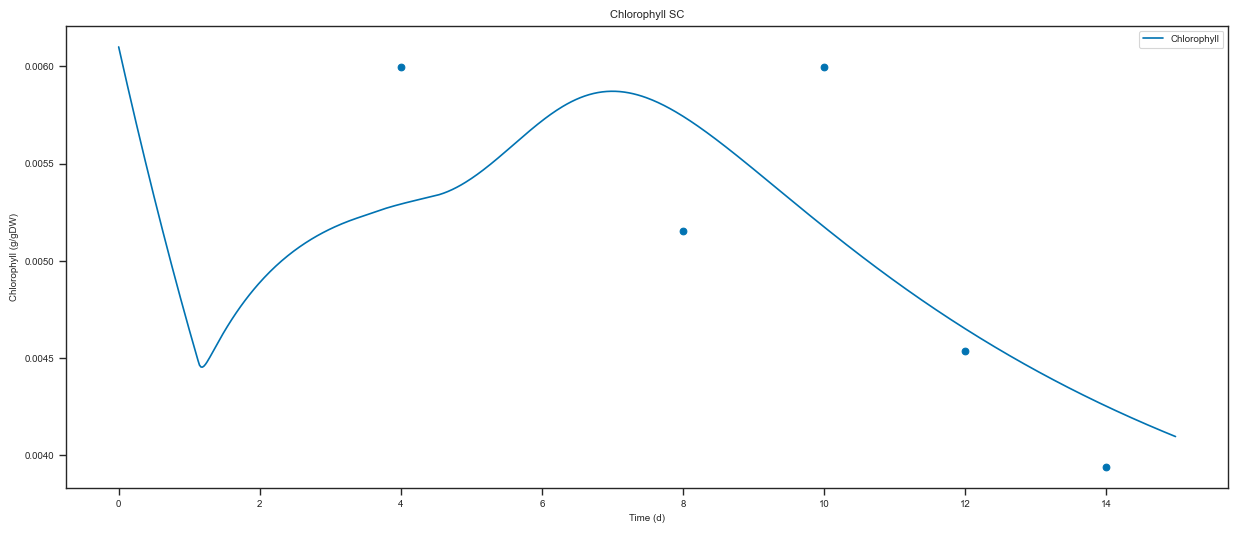

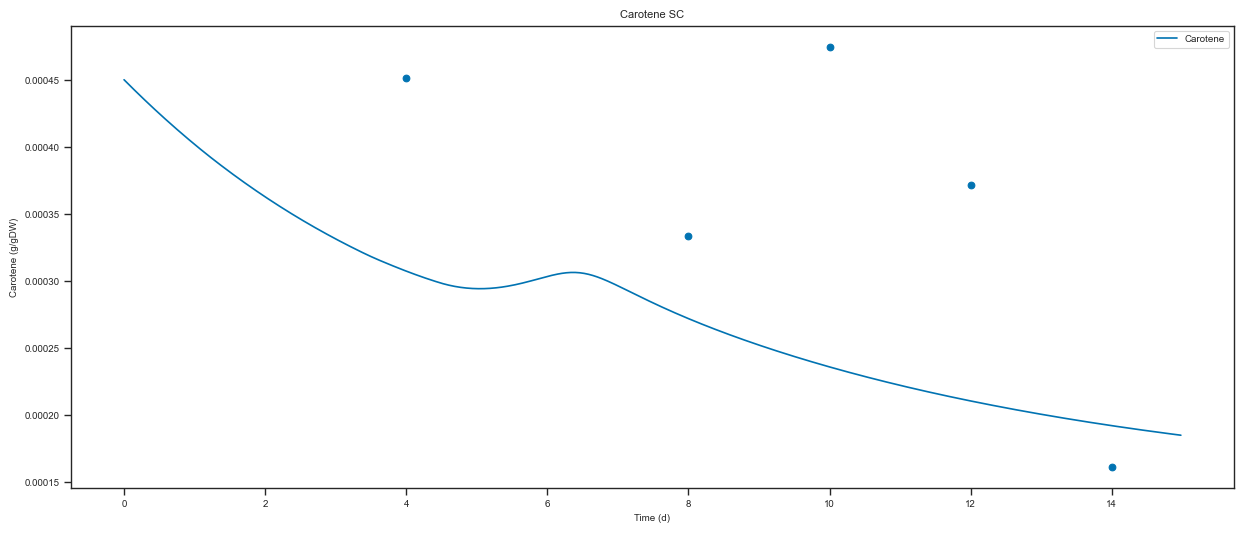

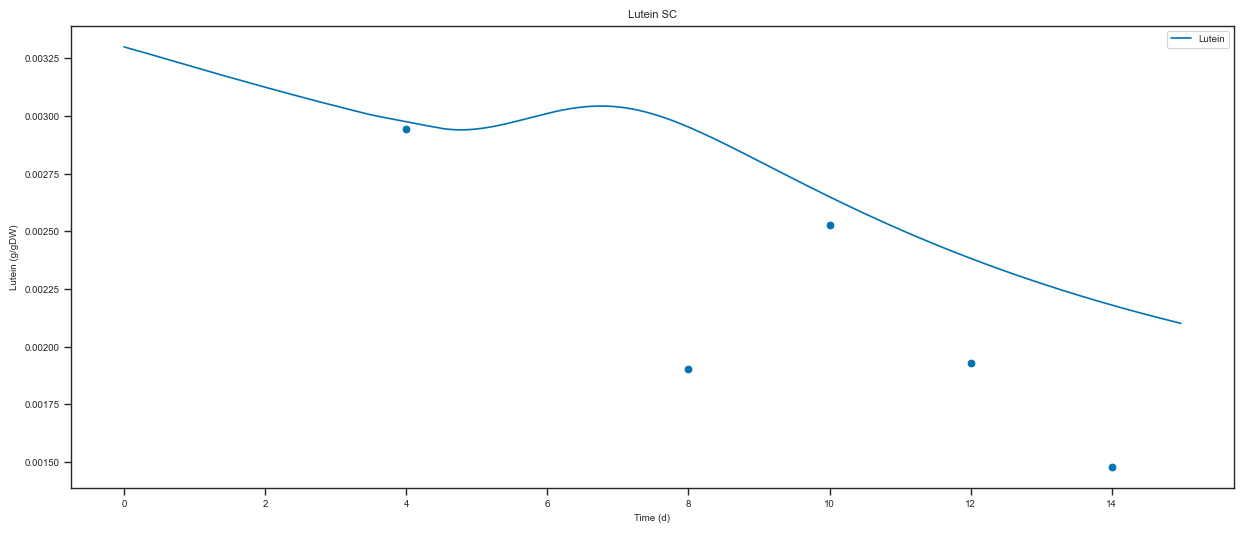

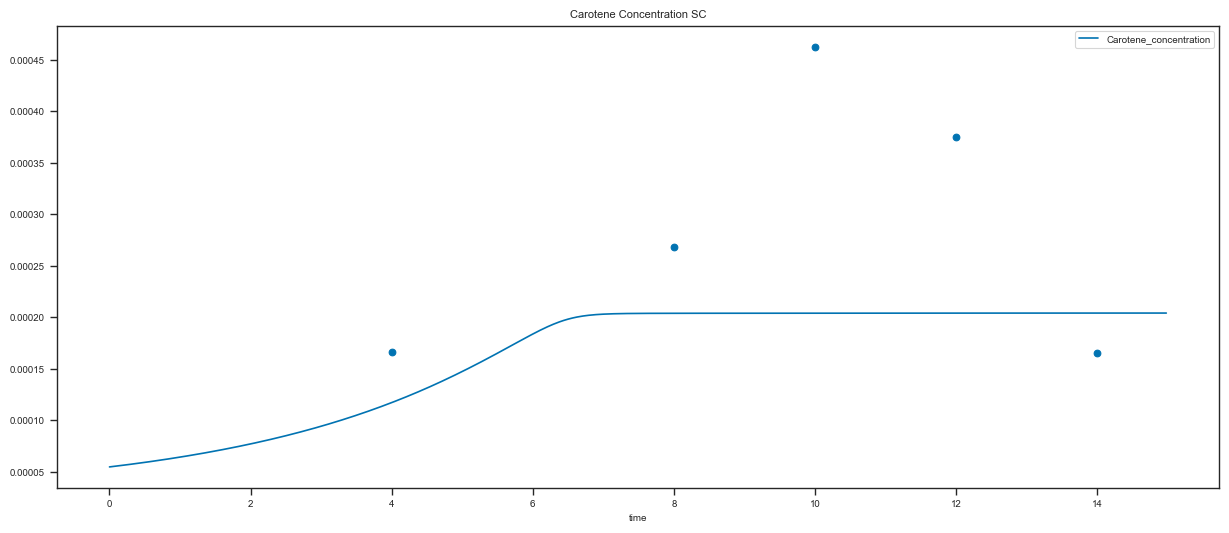

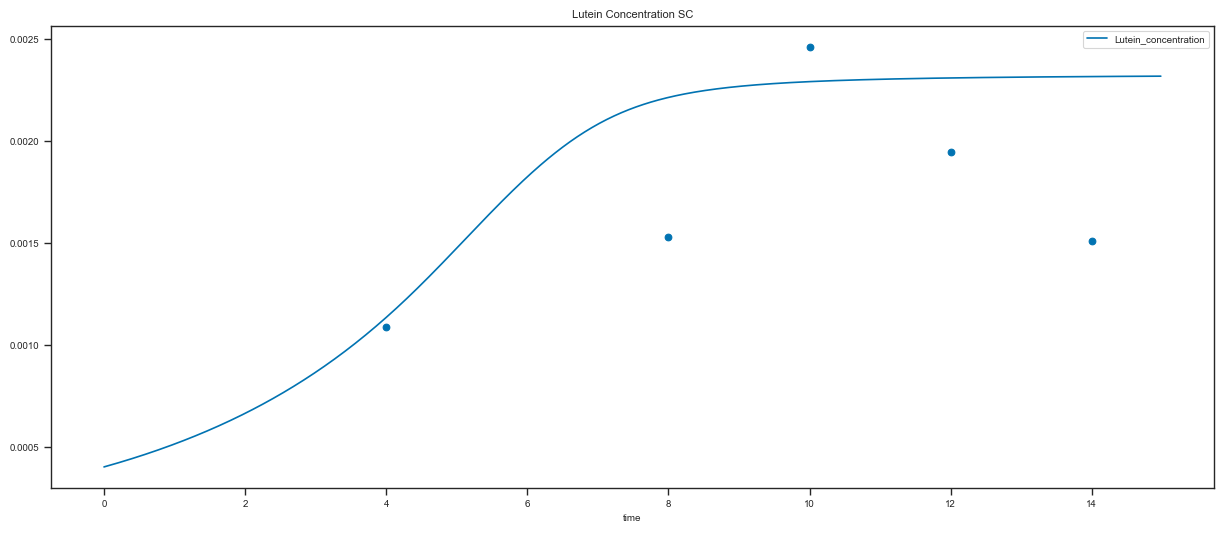

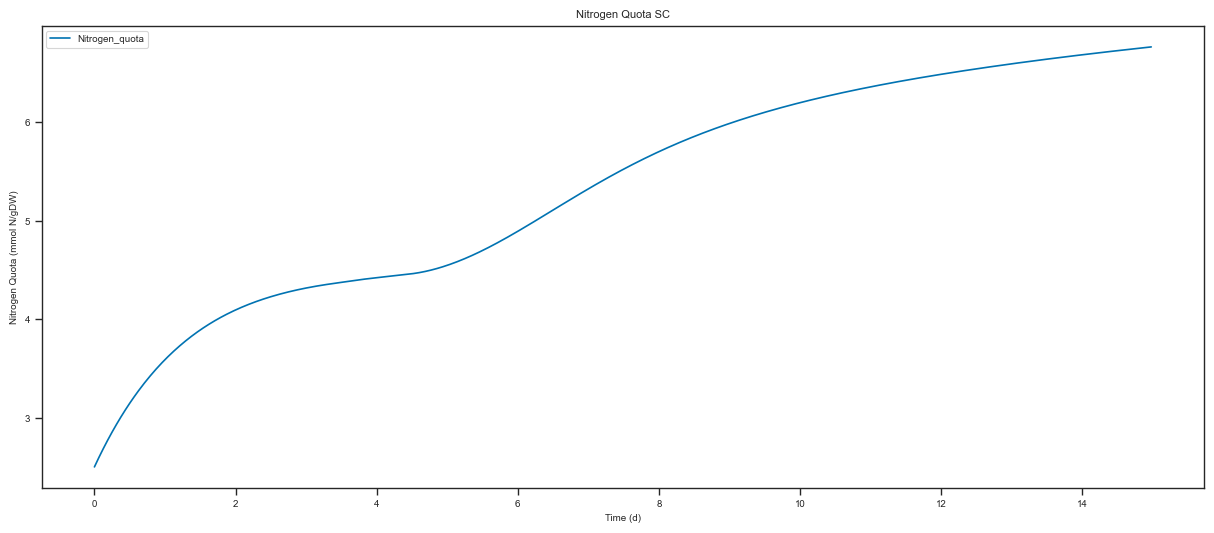

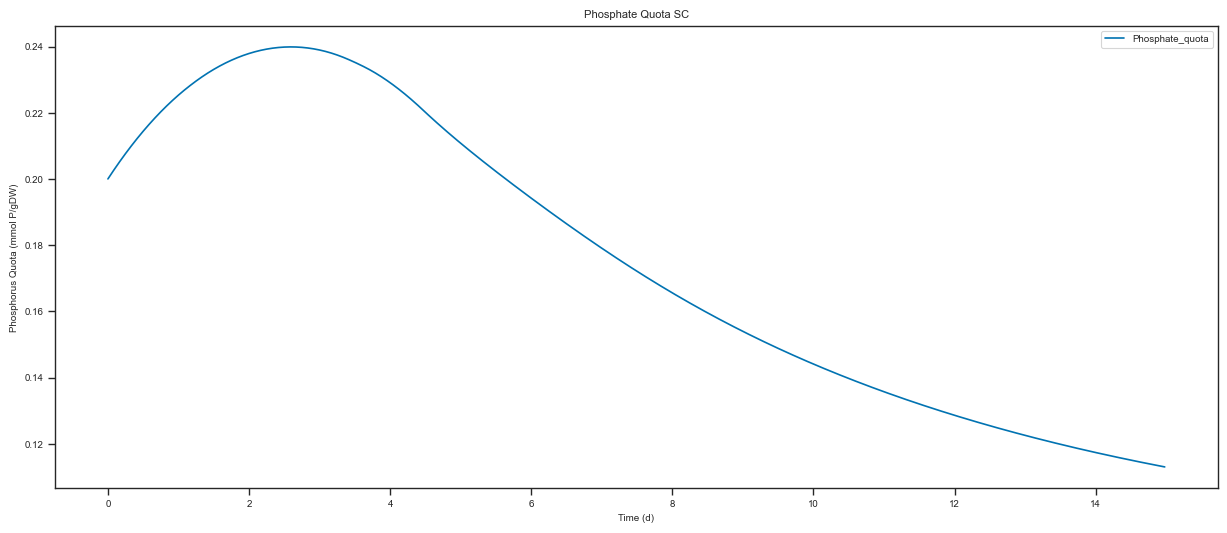

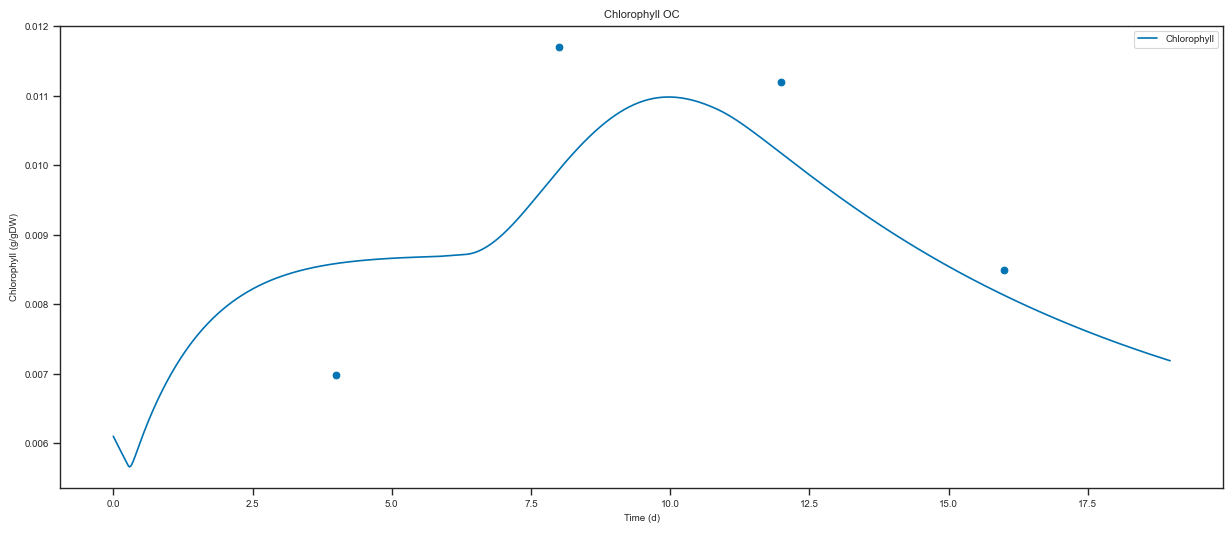

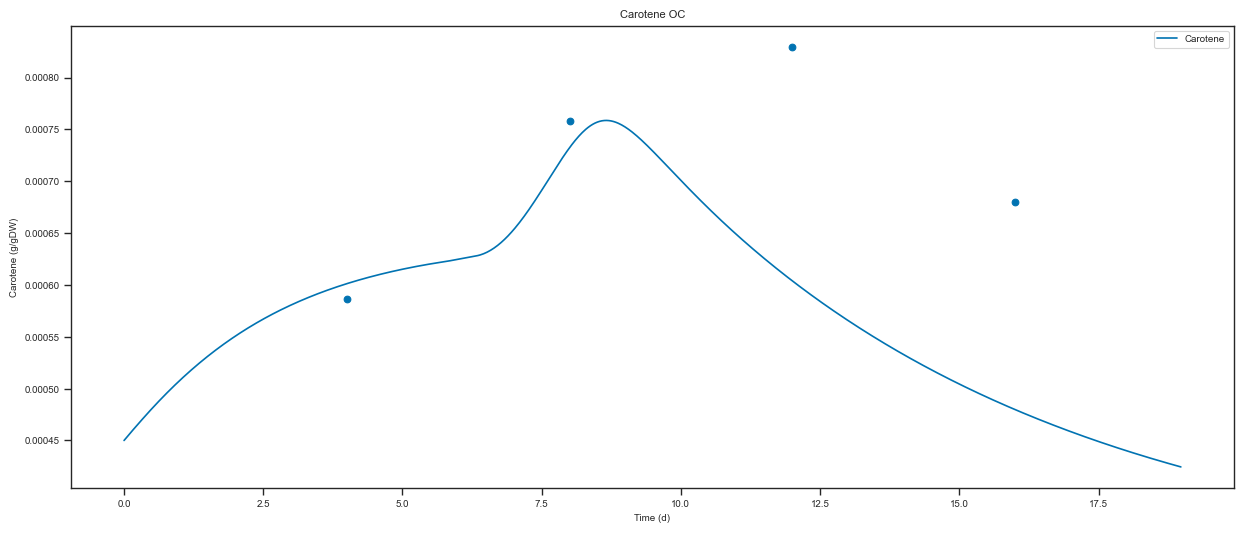

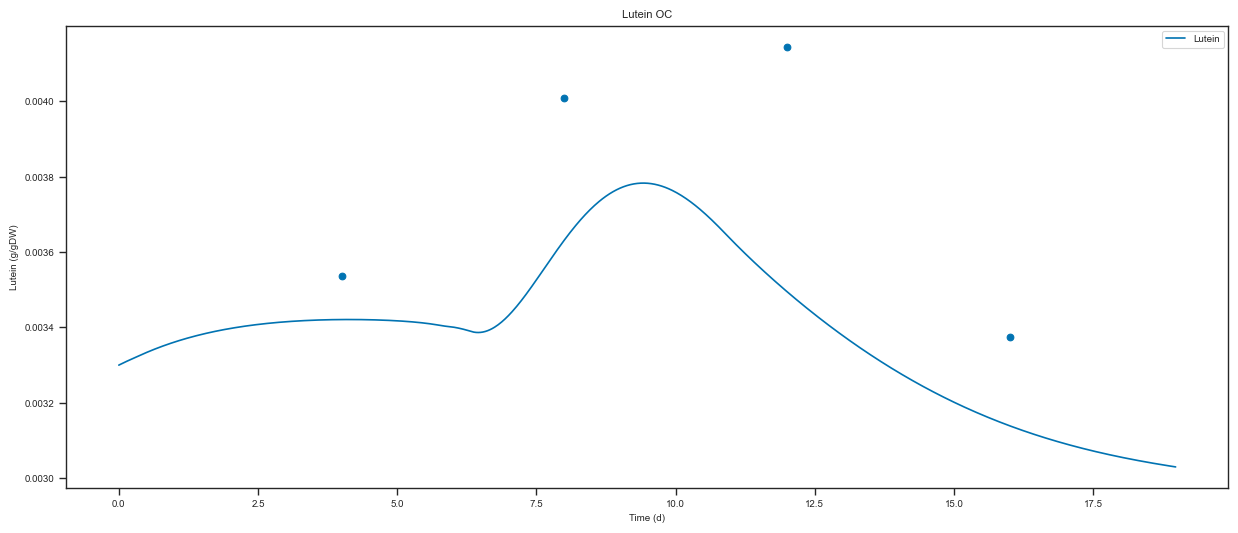

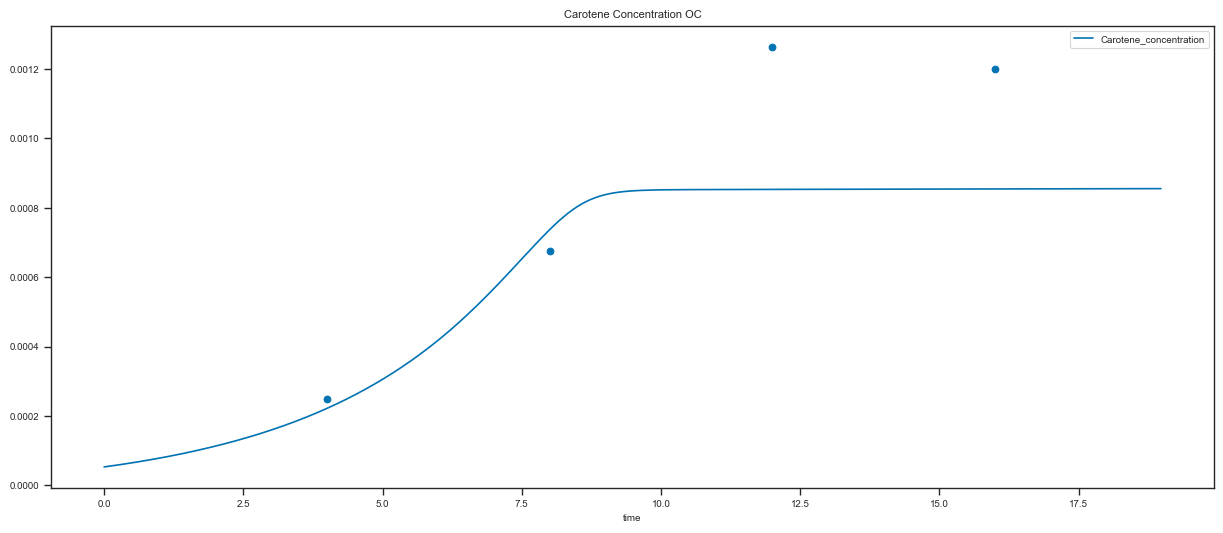

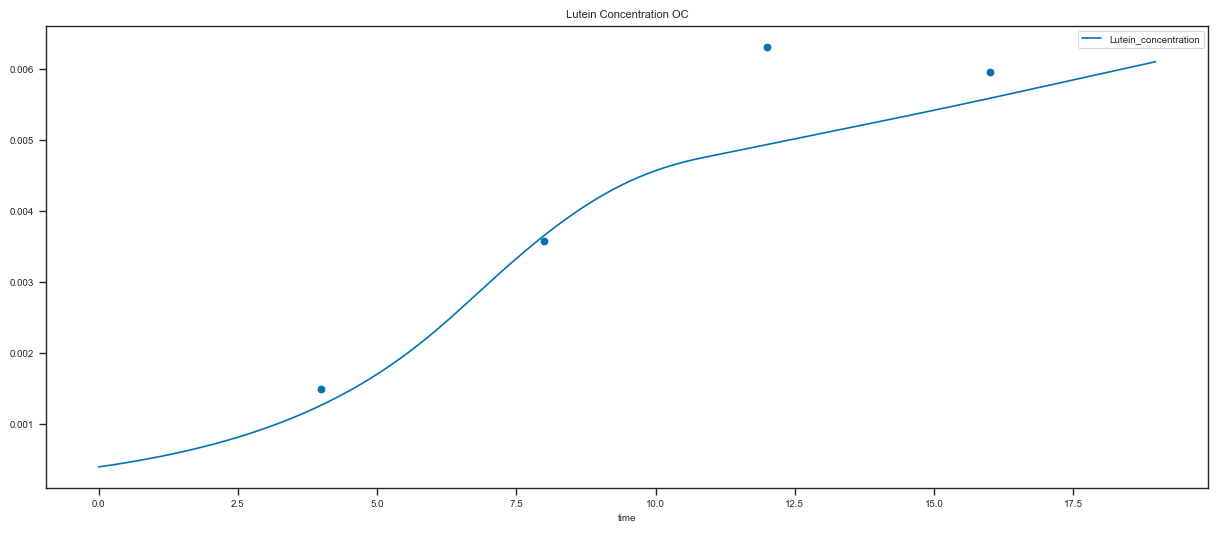

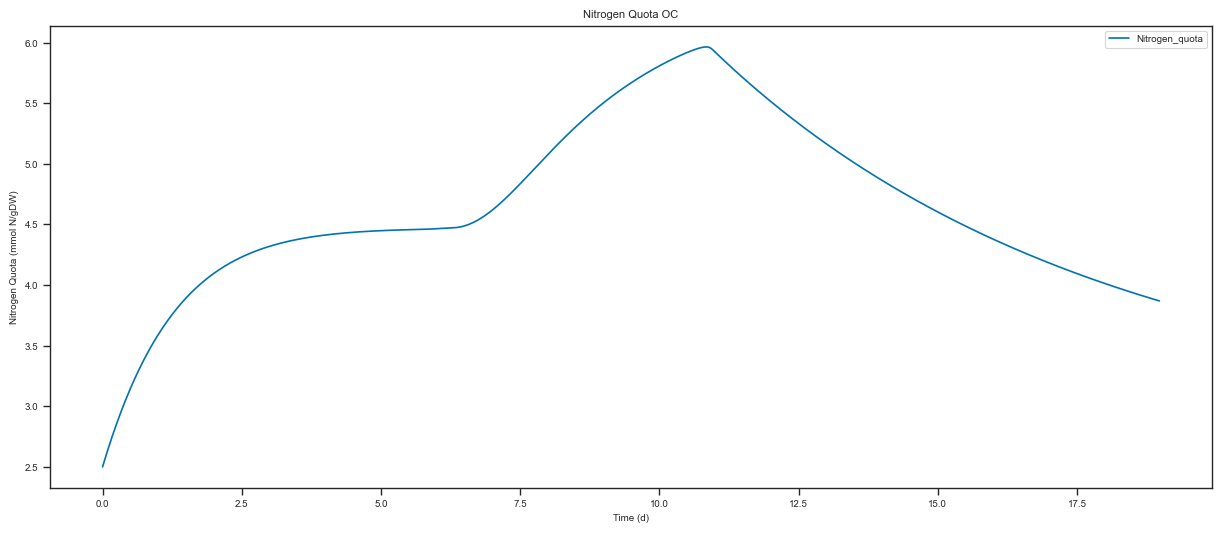

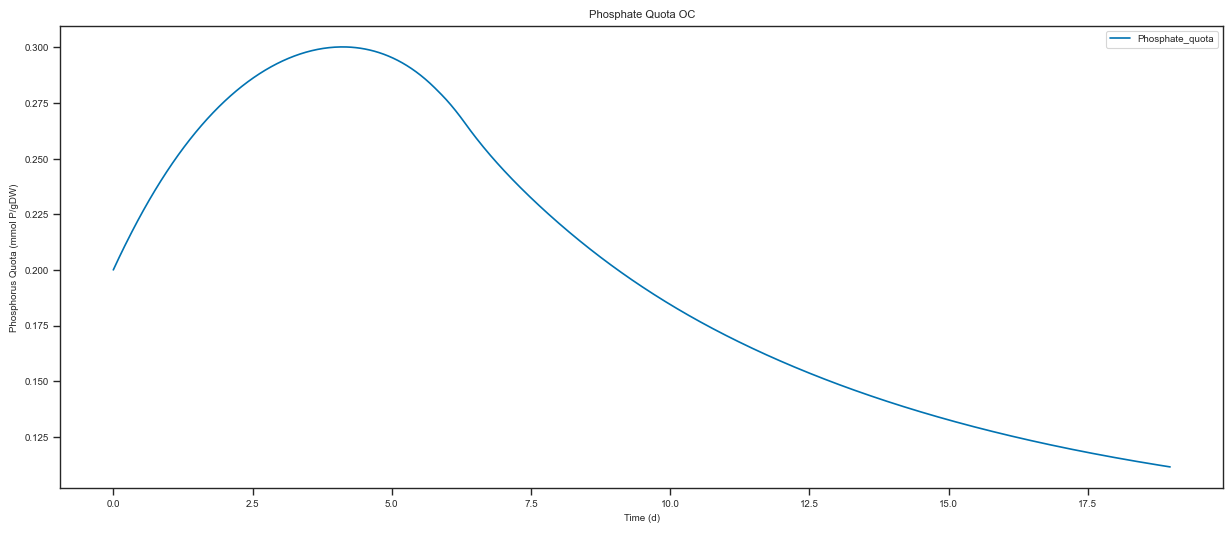

In [21]:
plot_caros()

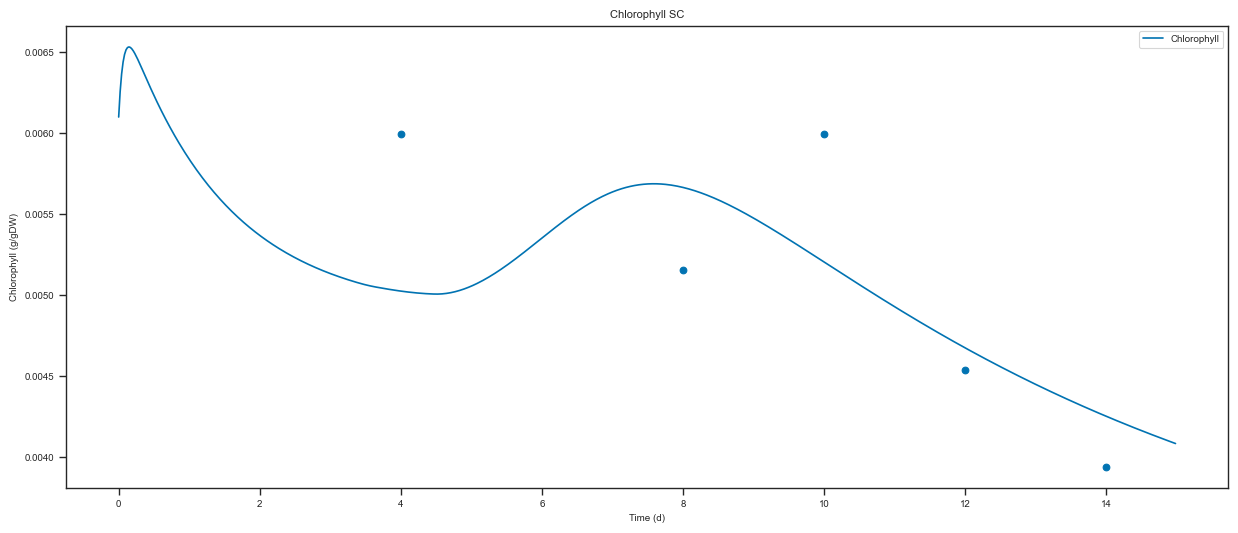

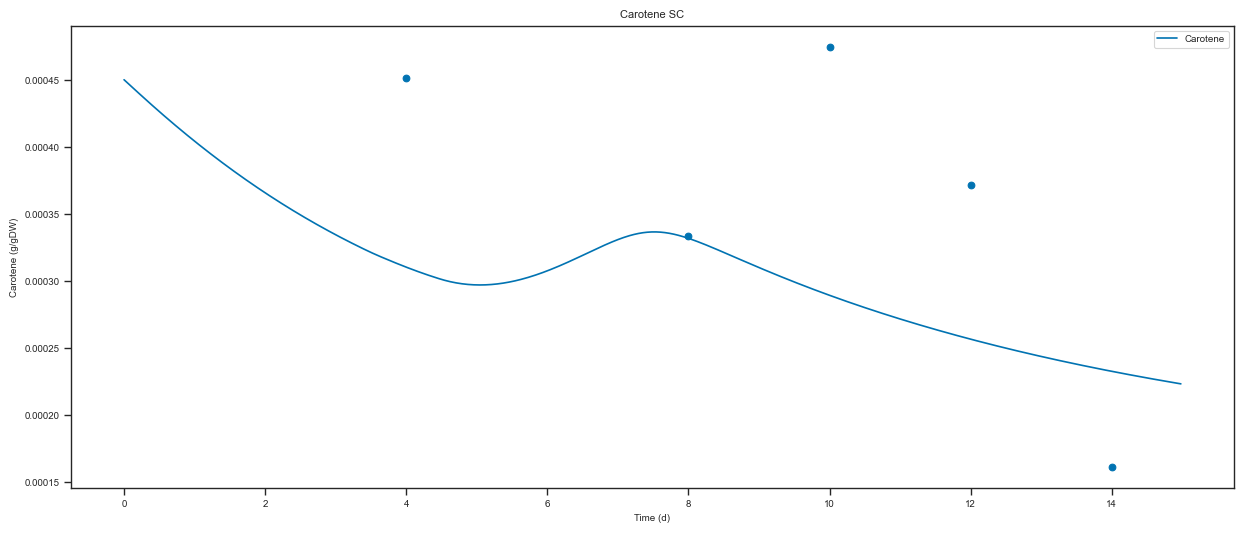

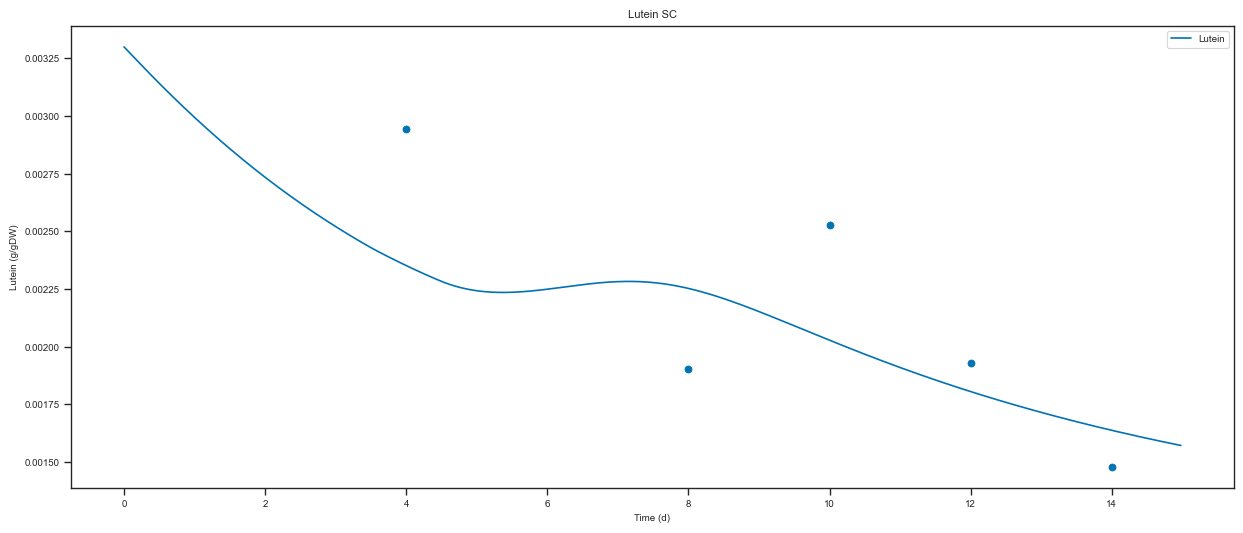

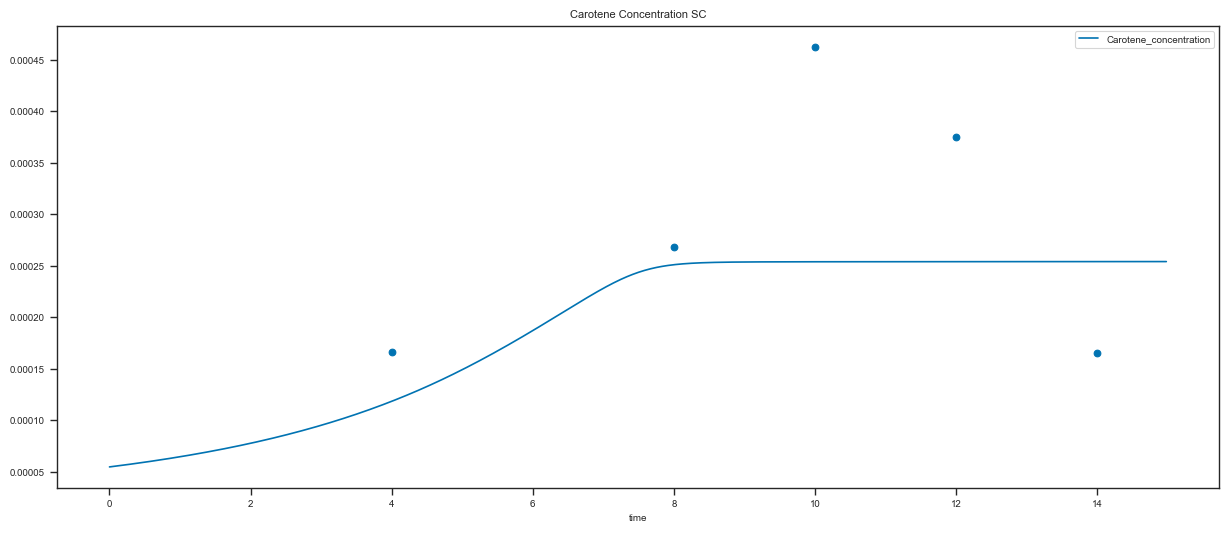

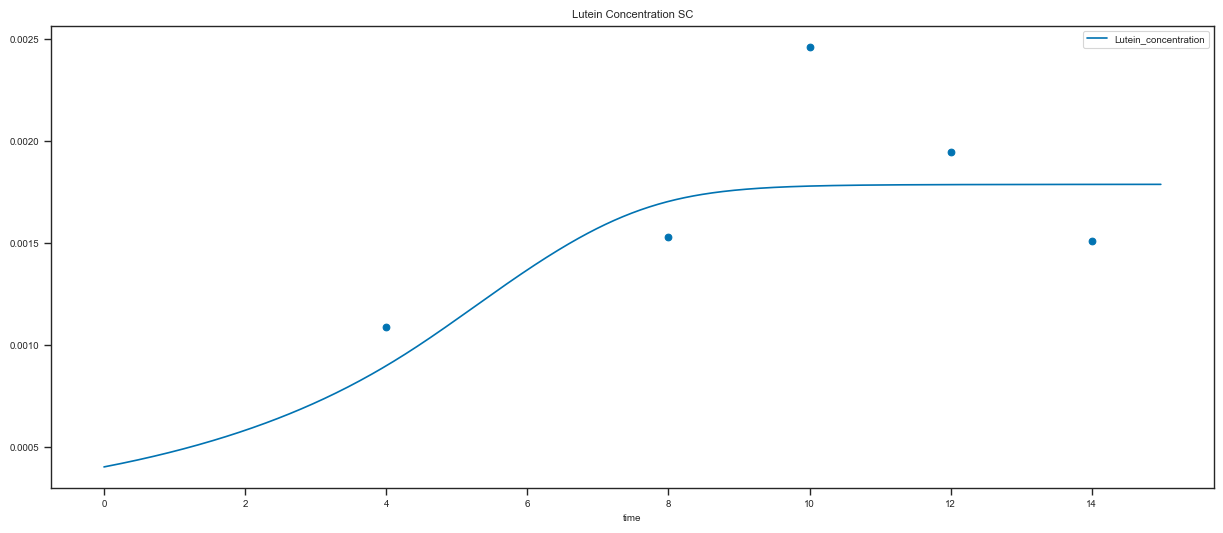

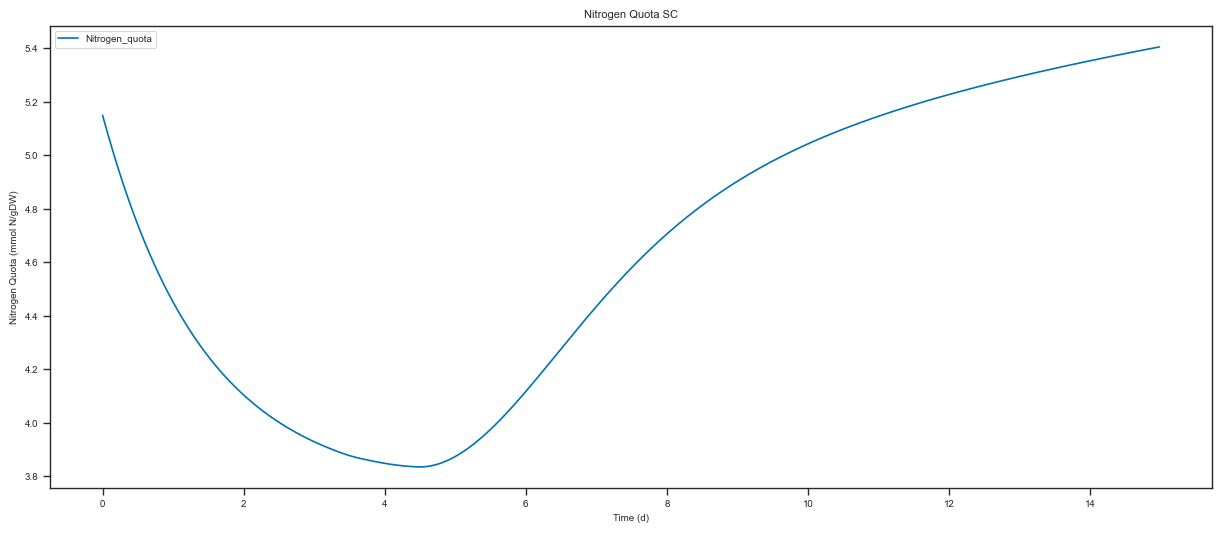

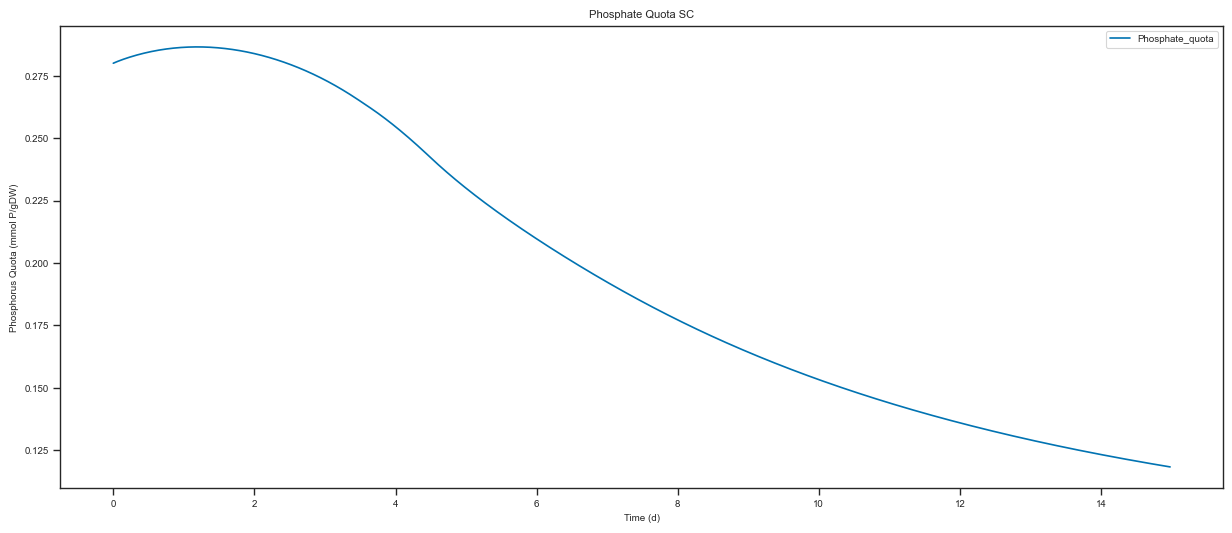

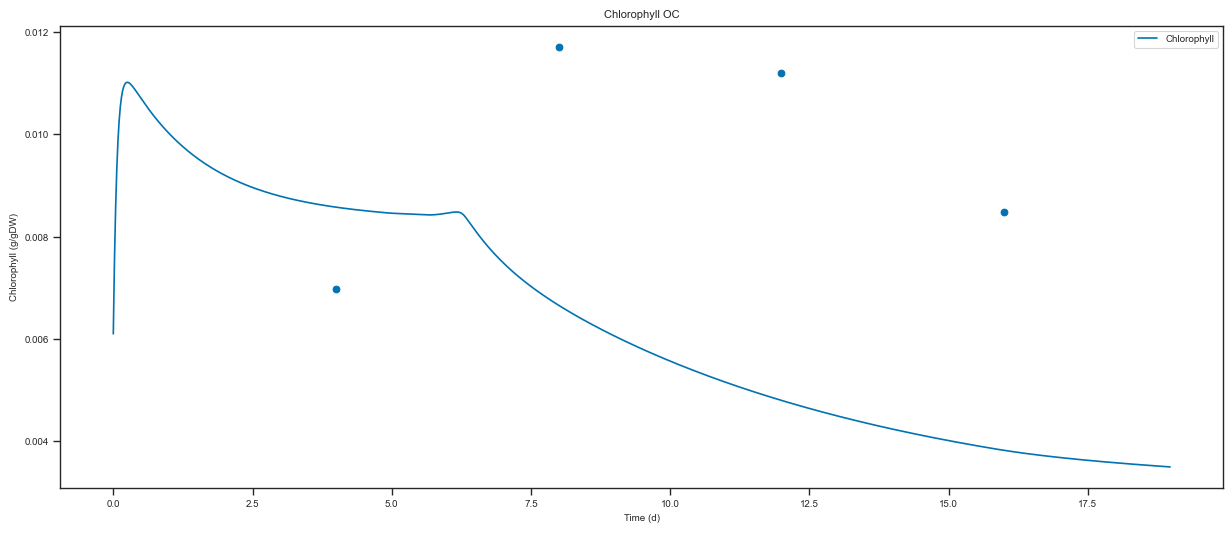

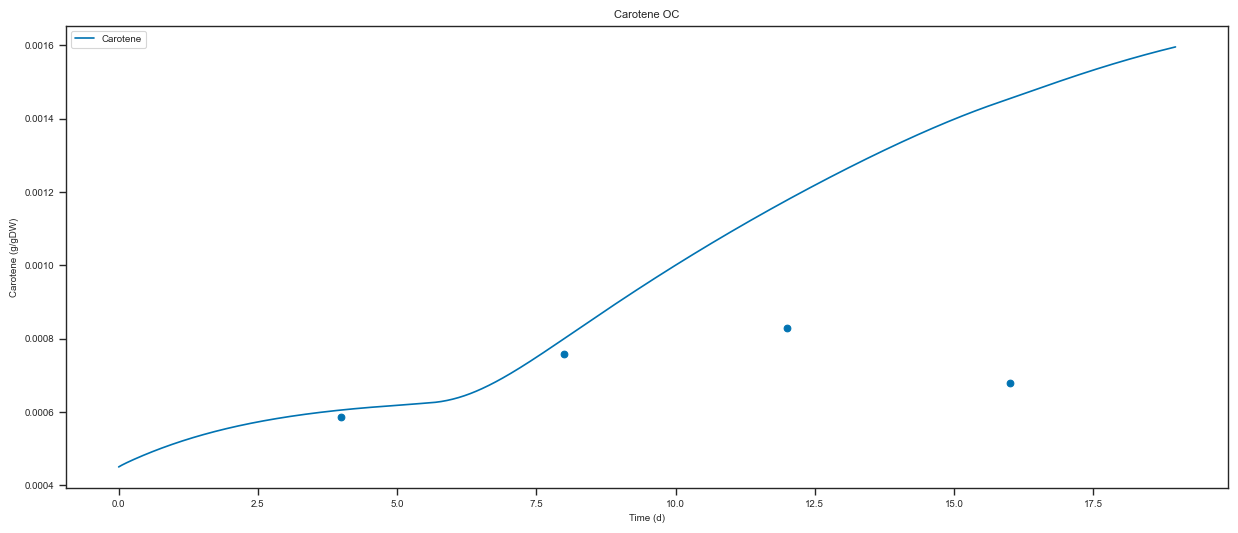

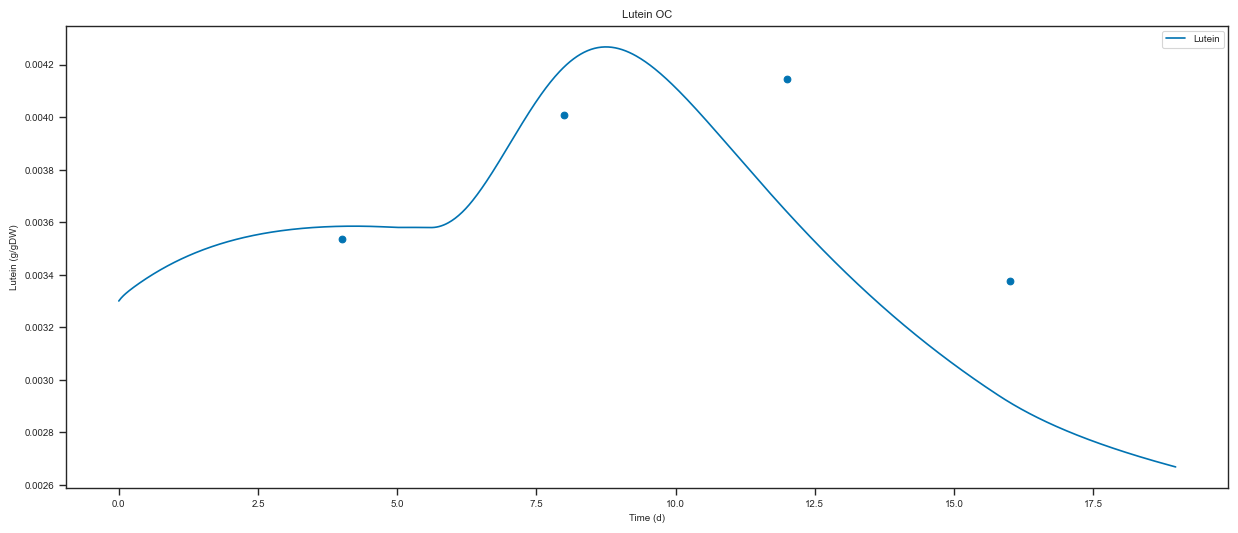

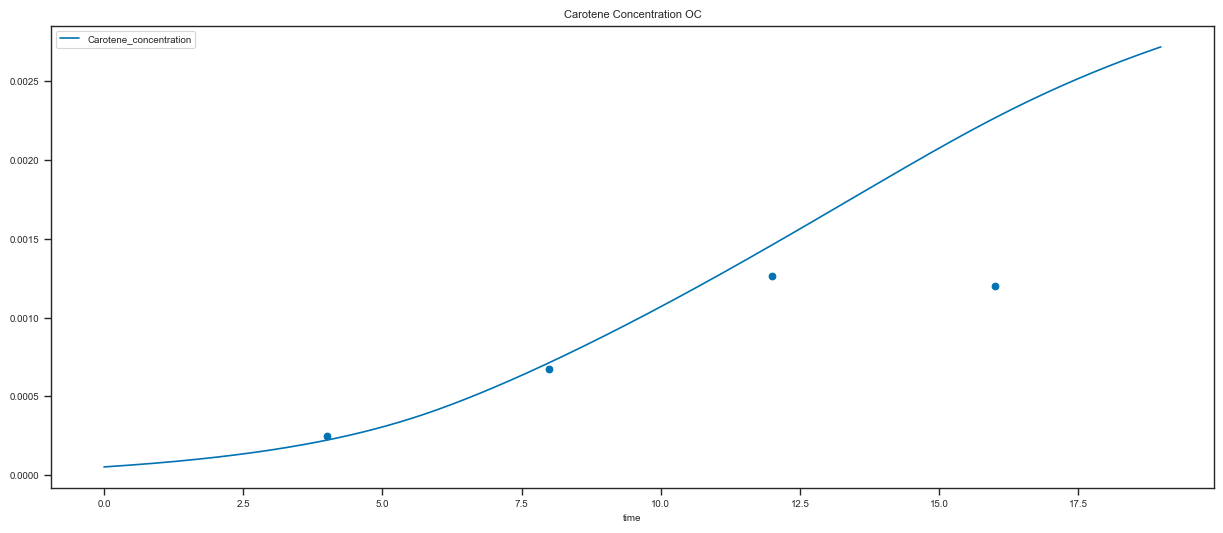

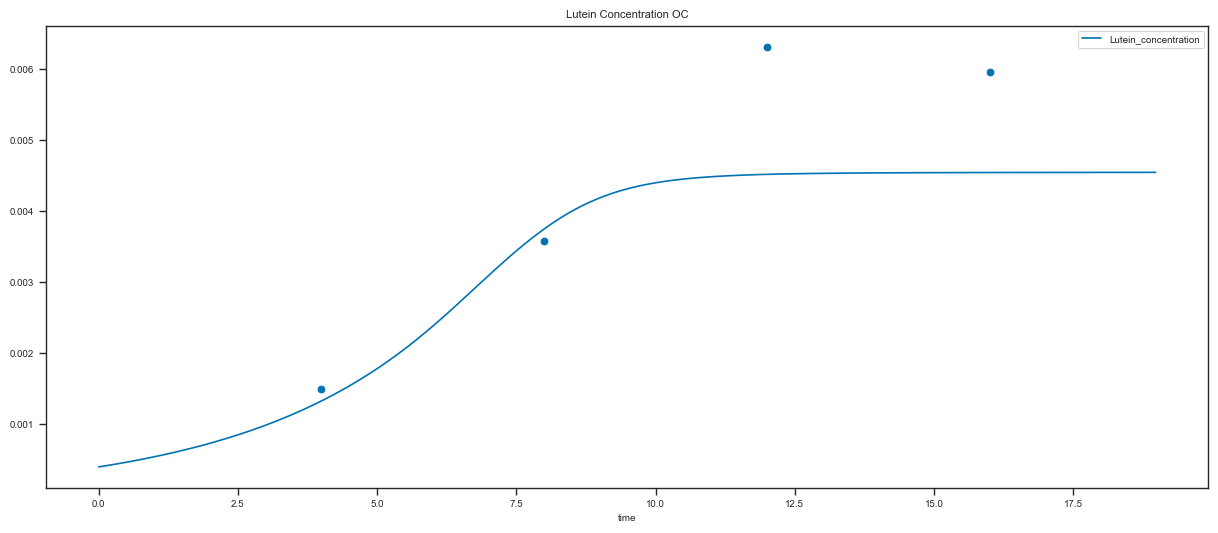

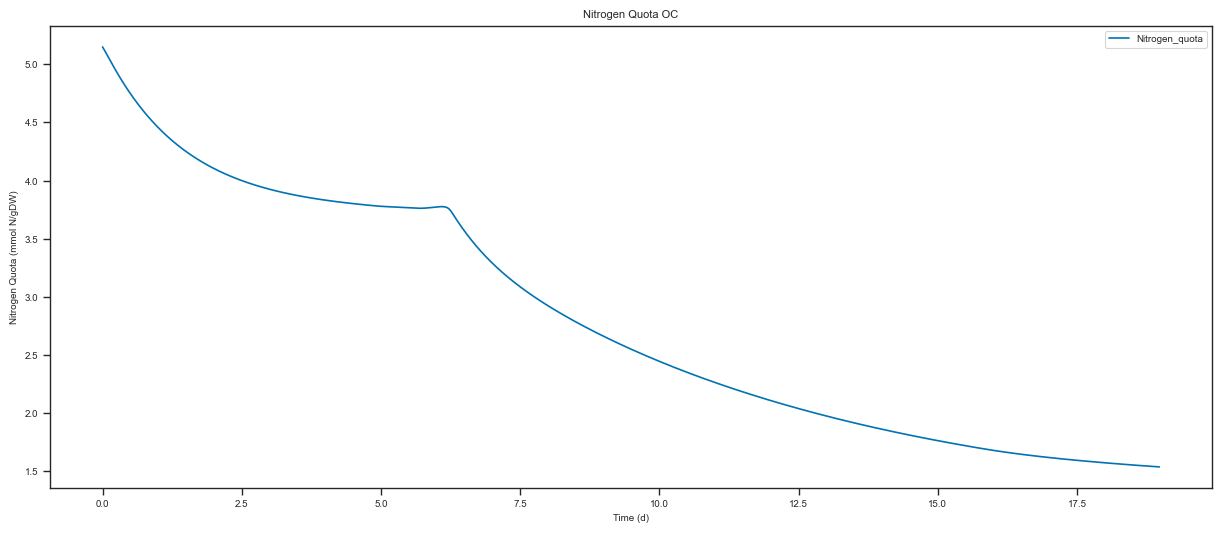

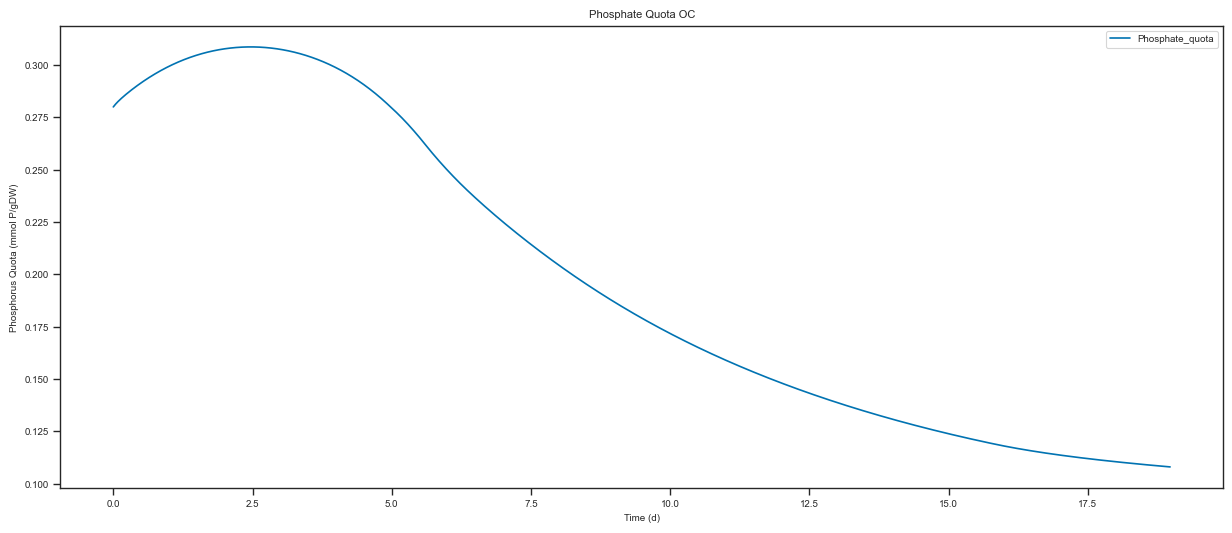

In [6]:
plot_caros()

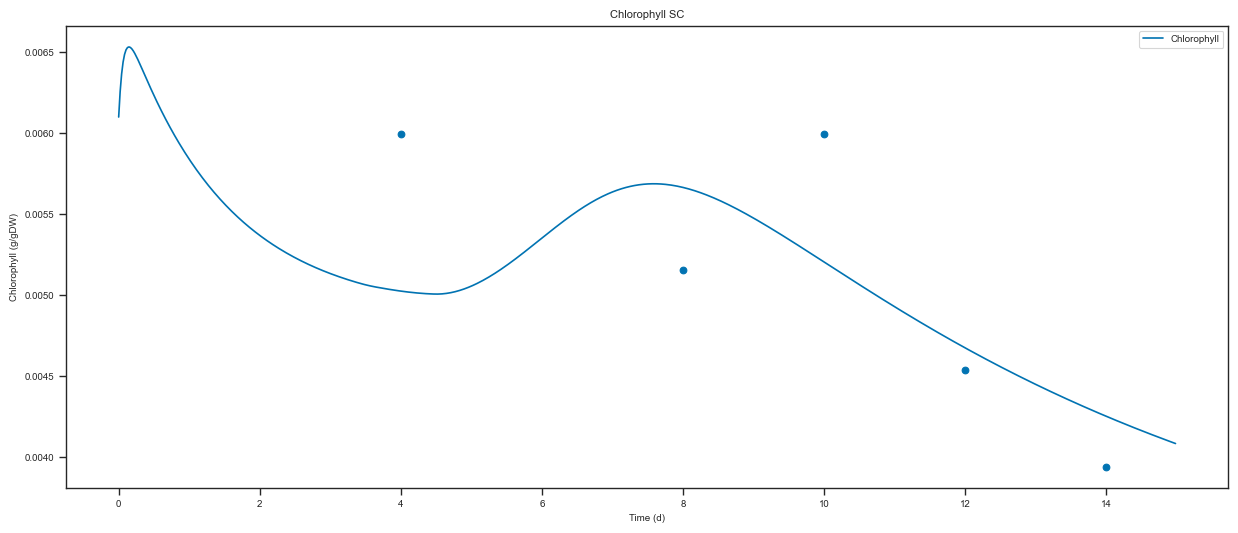

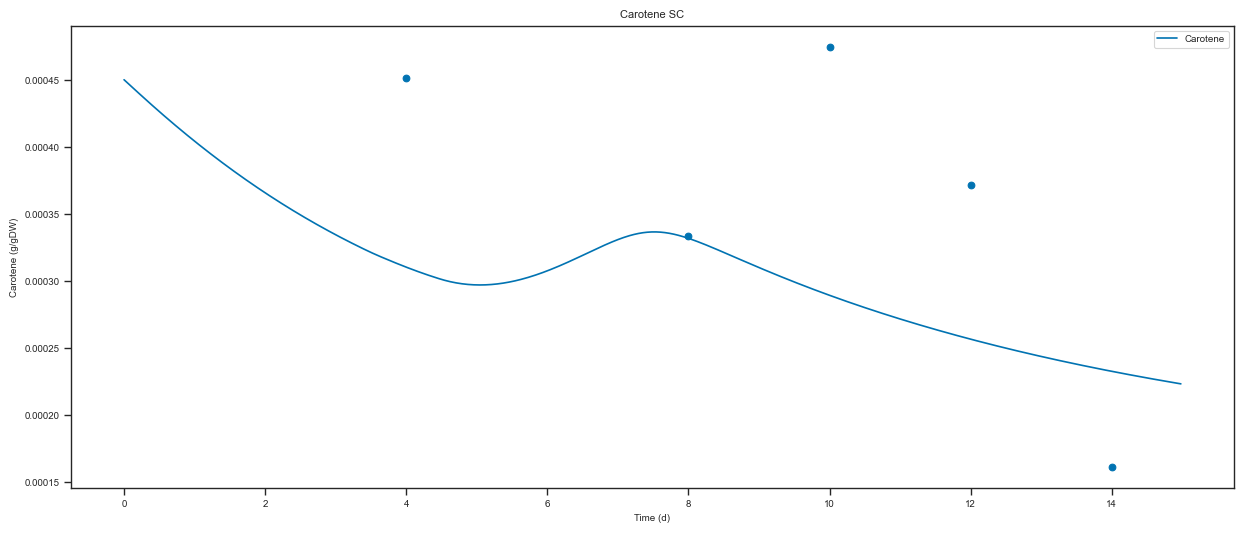

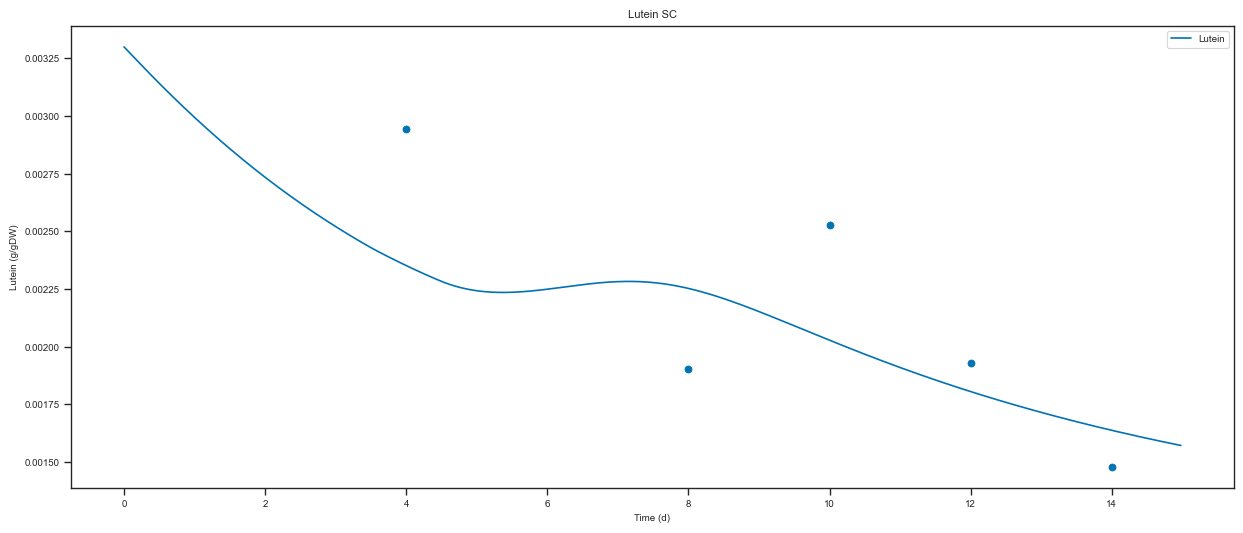

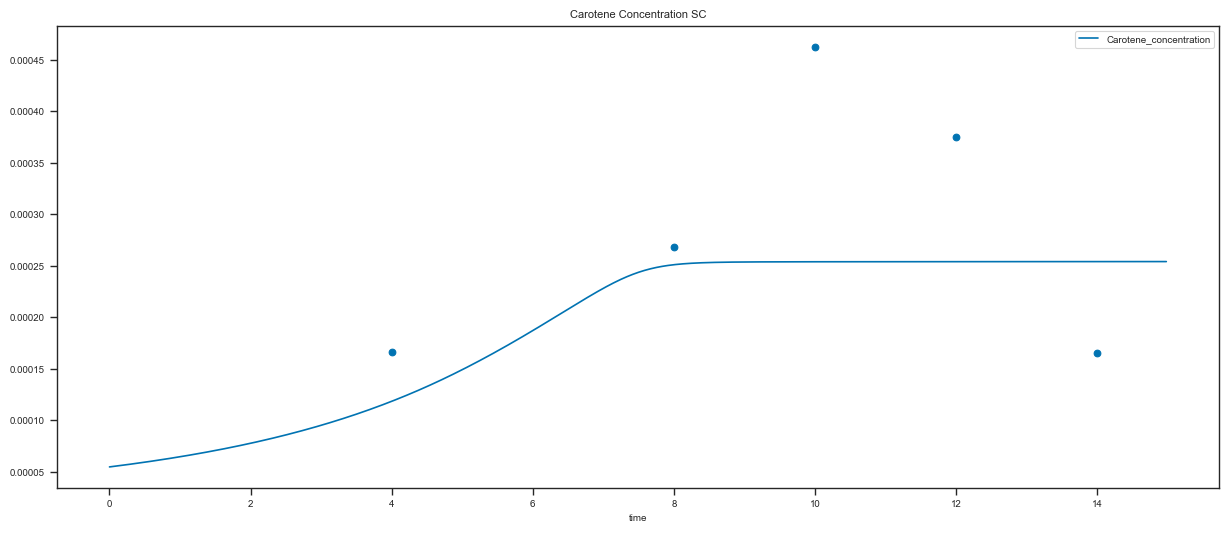

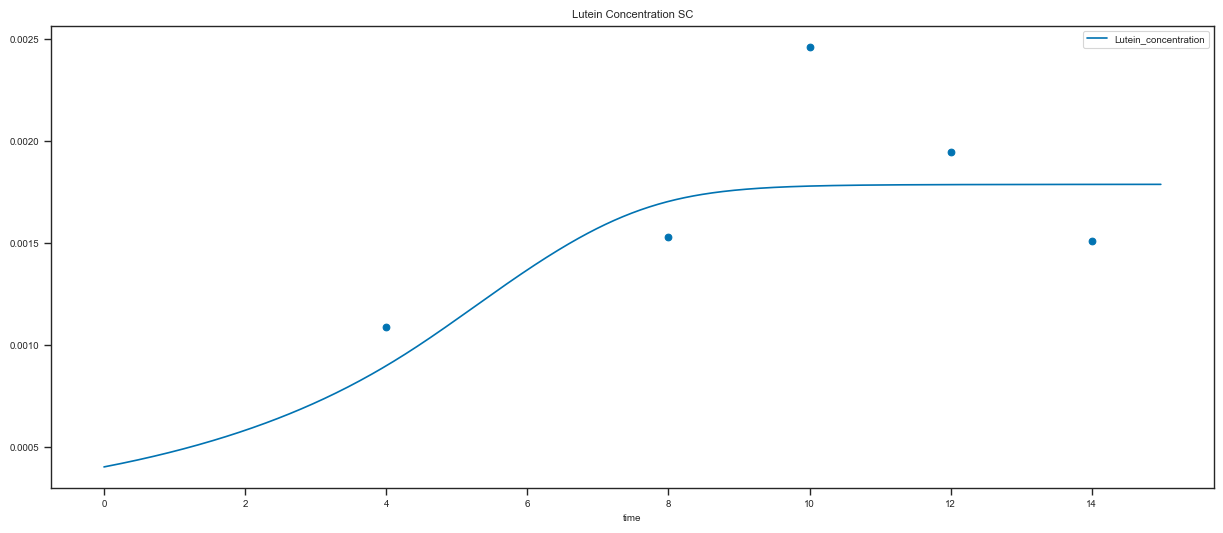

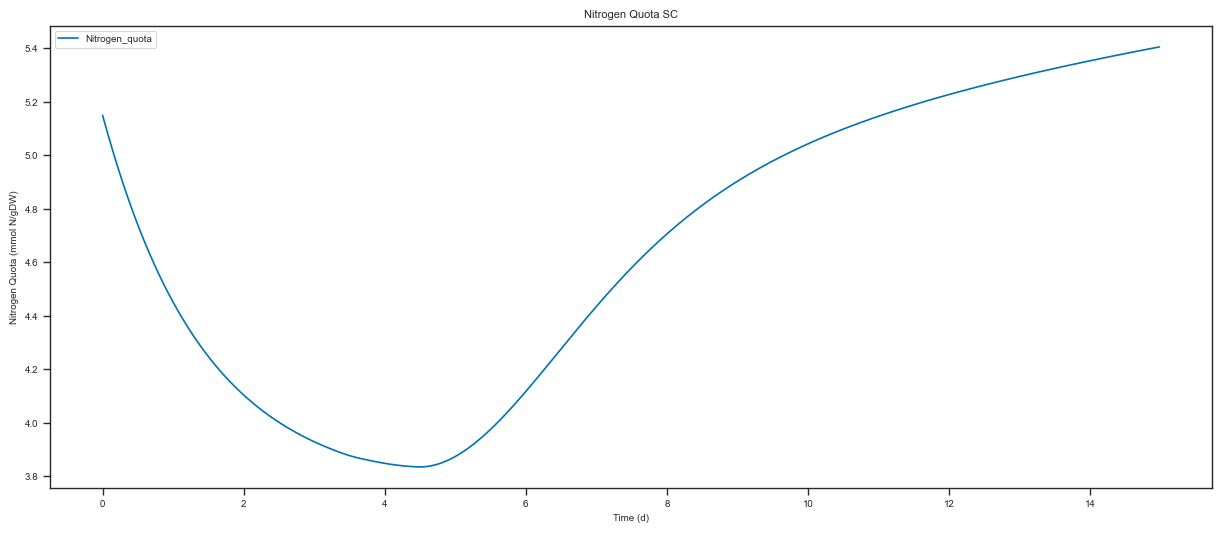

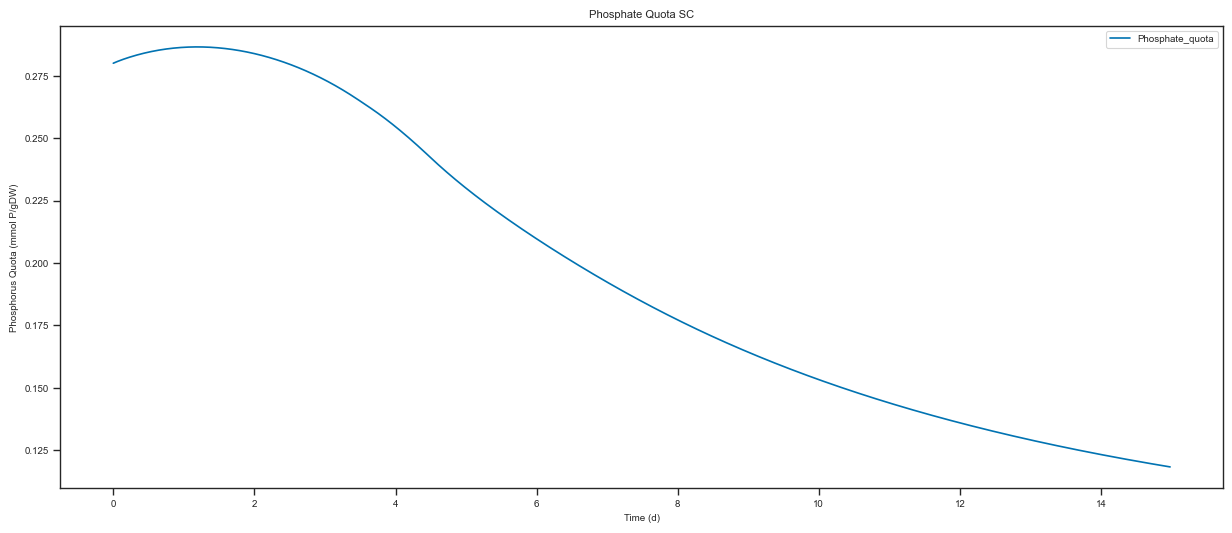

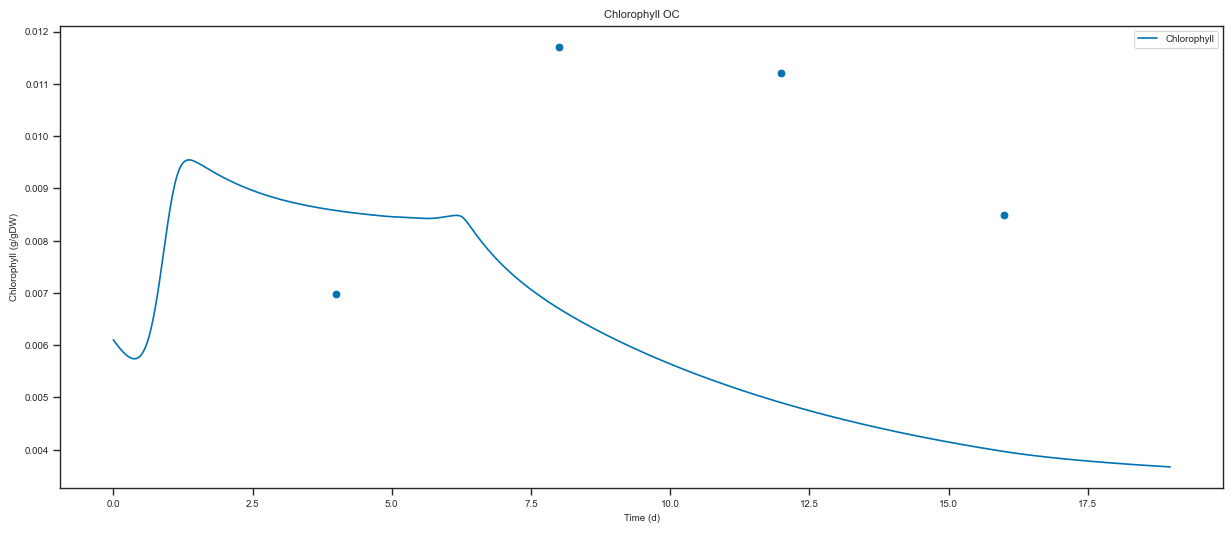

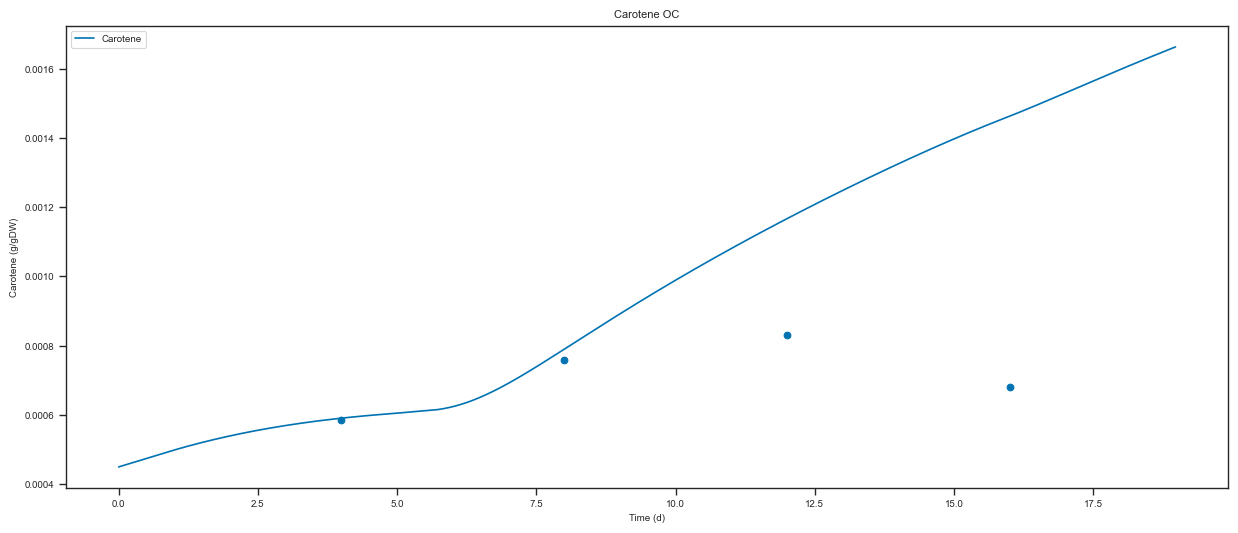

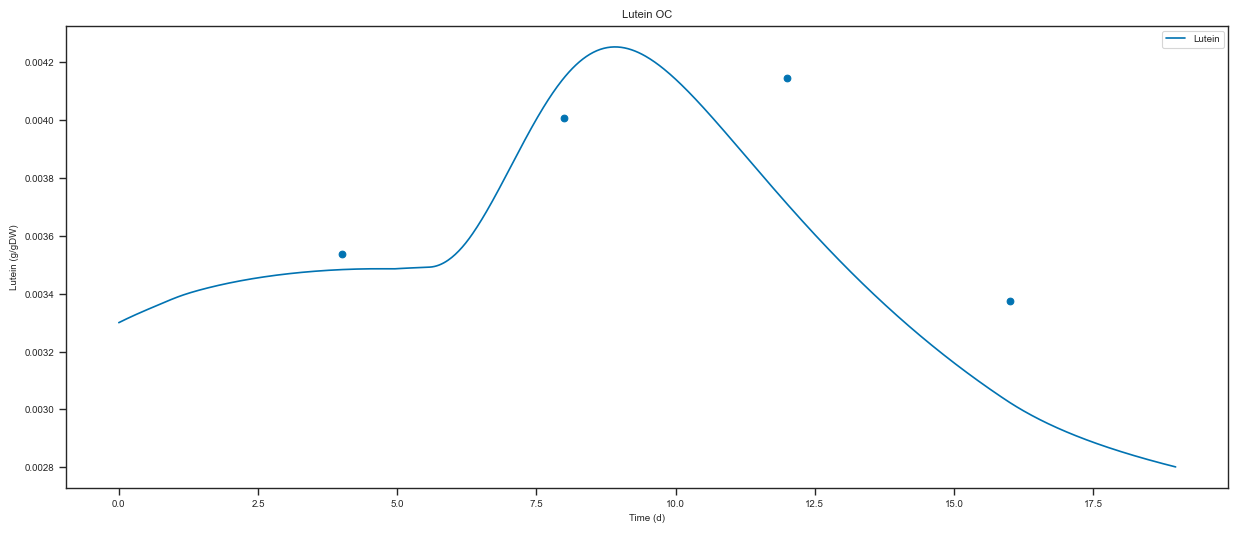

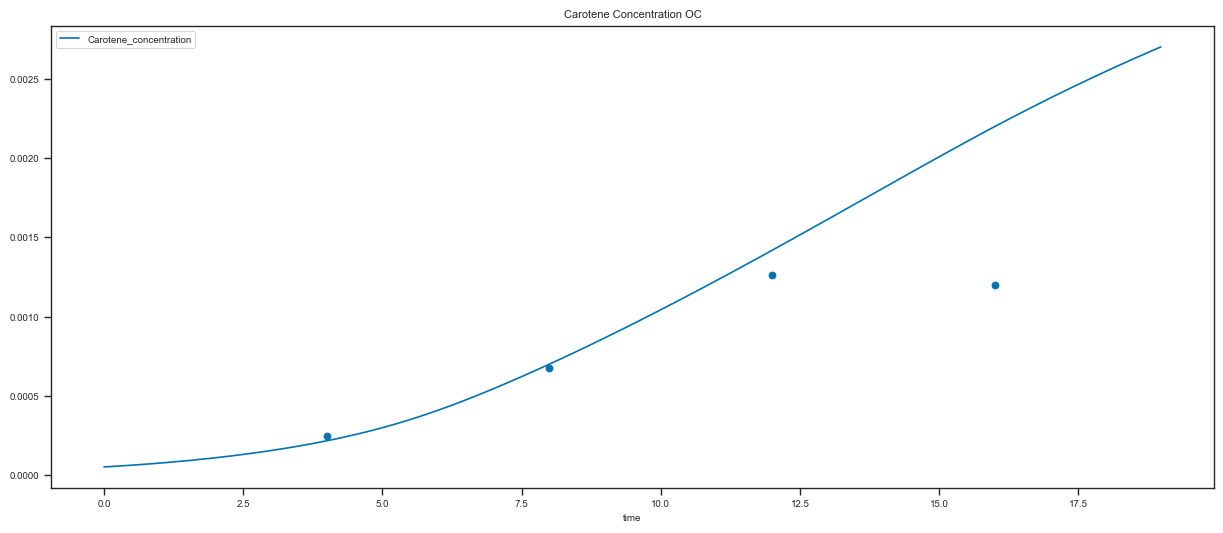

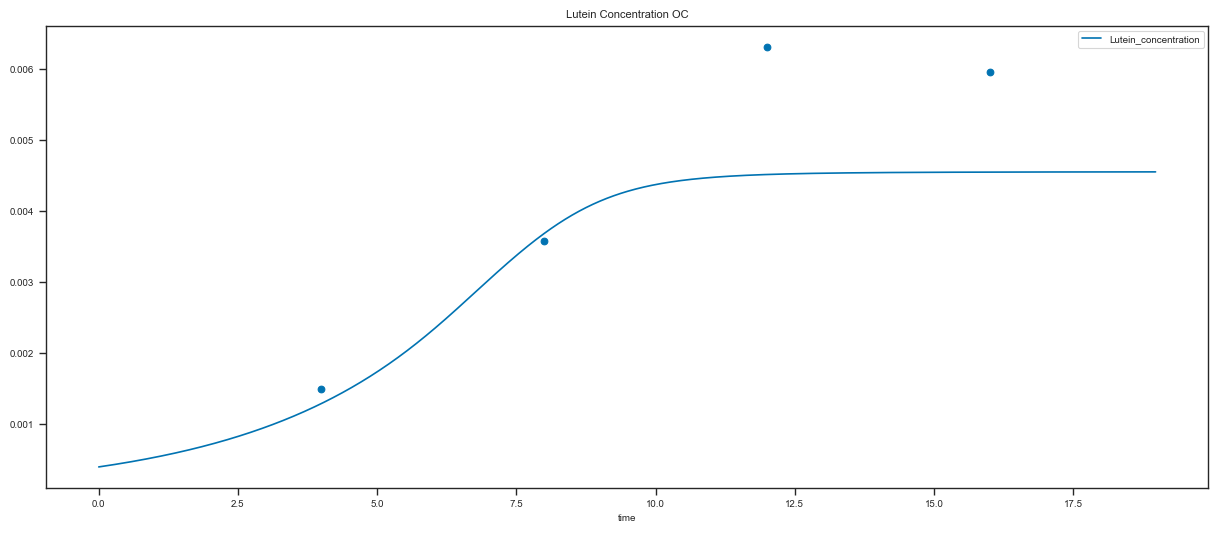

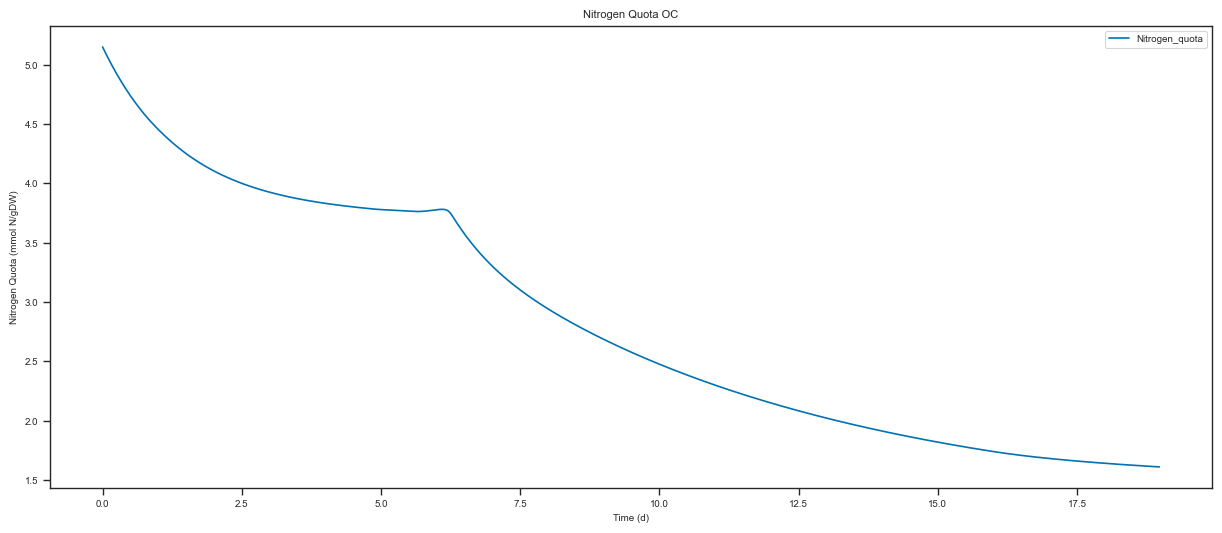

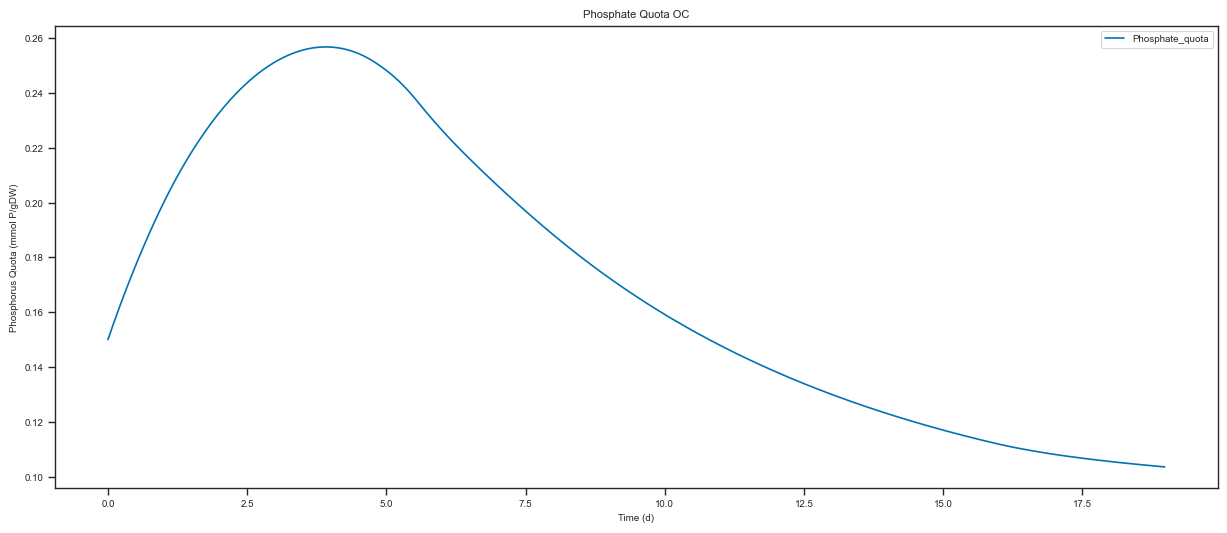

In [4]:
plot_caros()

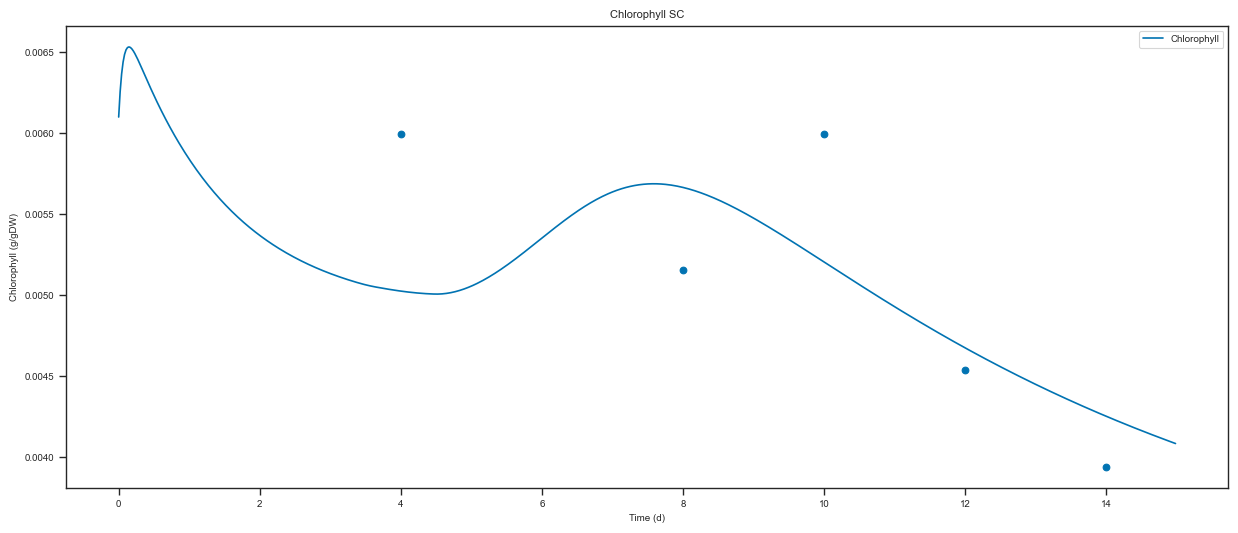

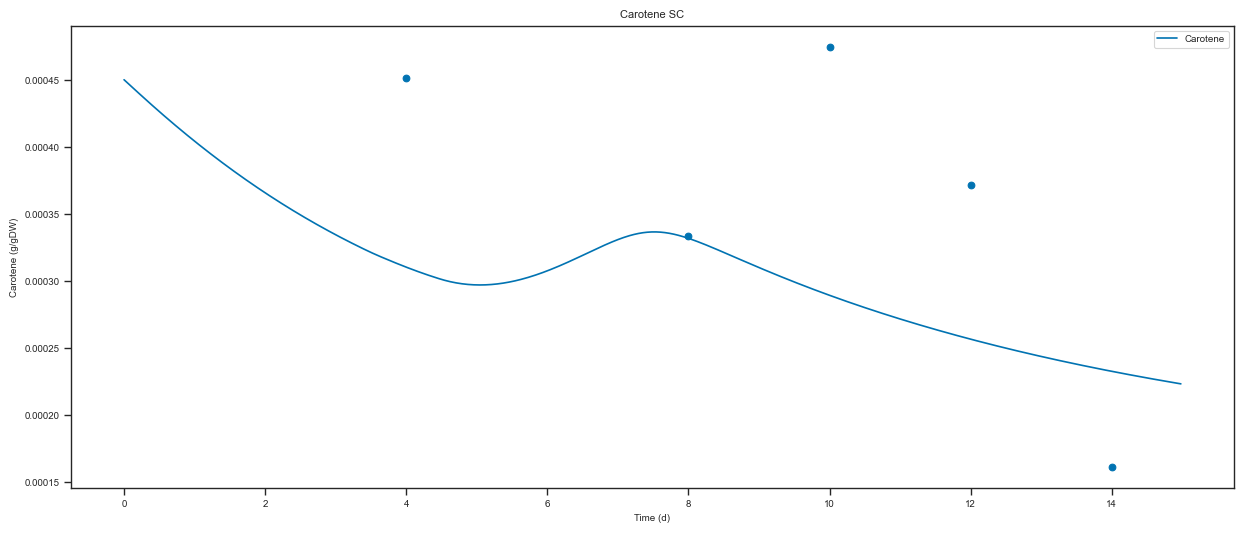

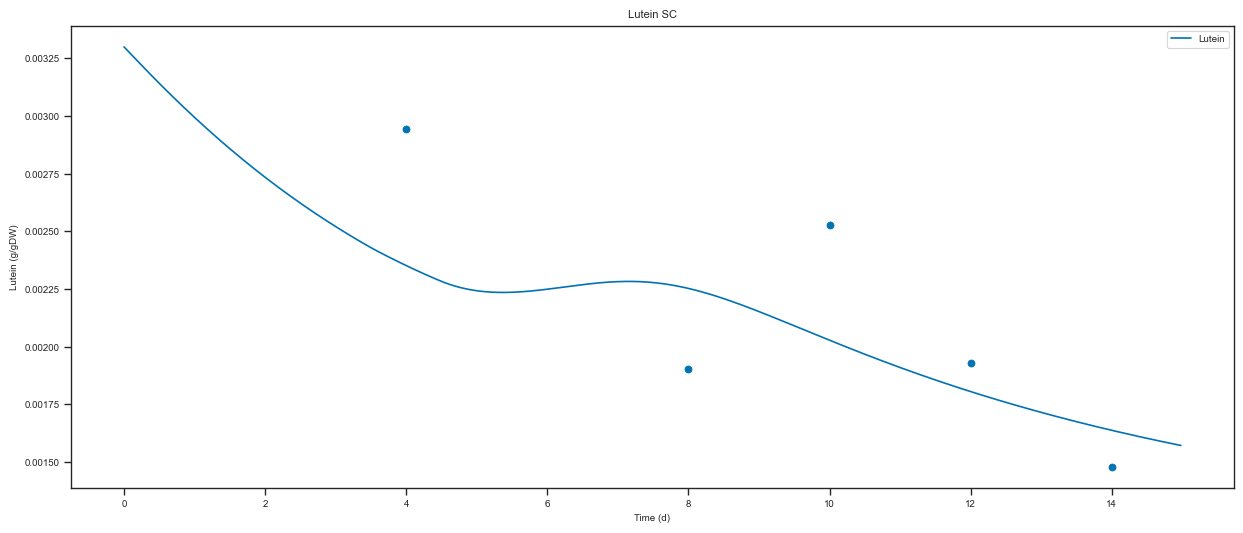

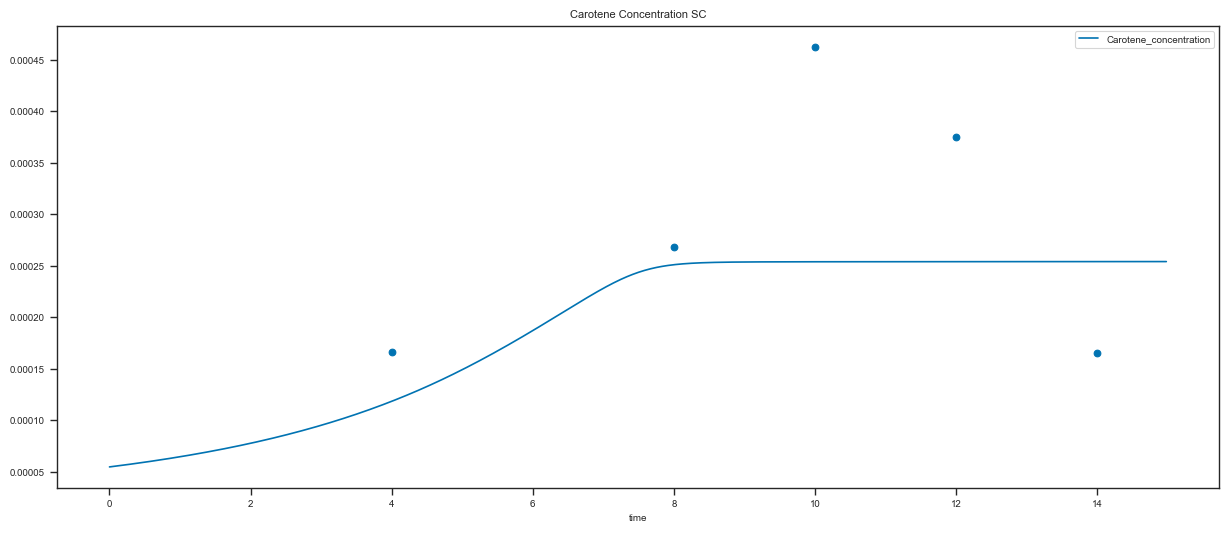

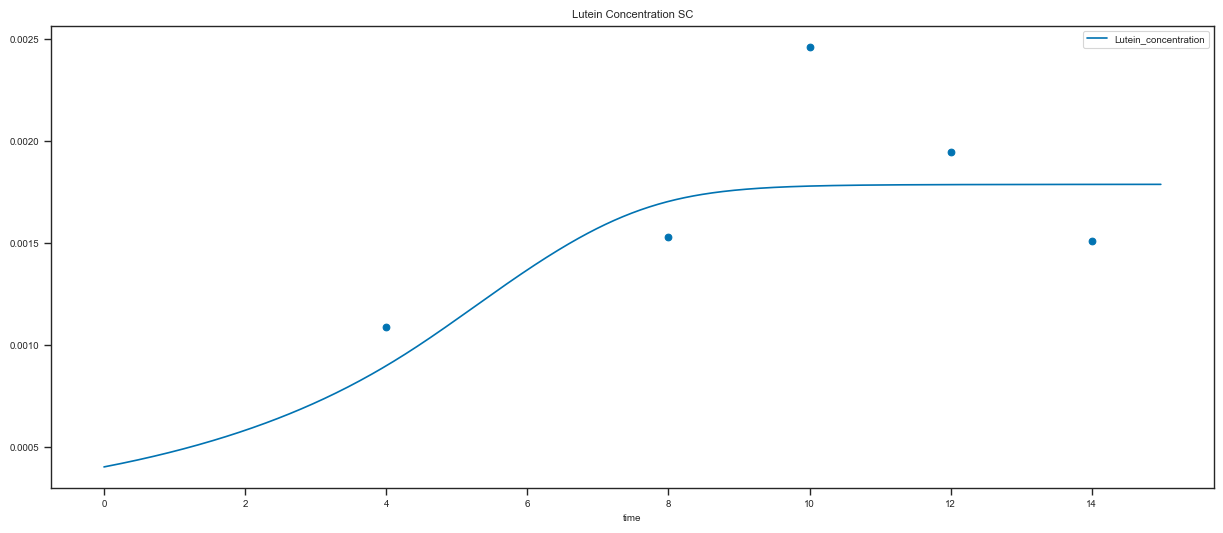

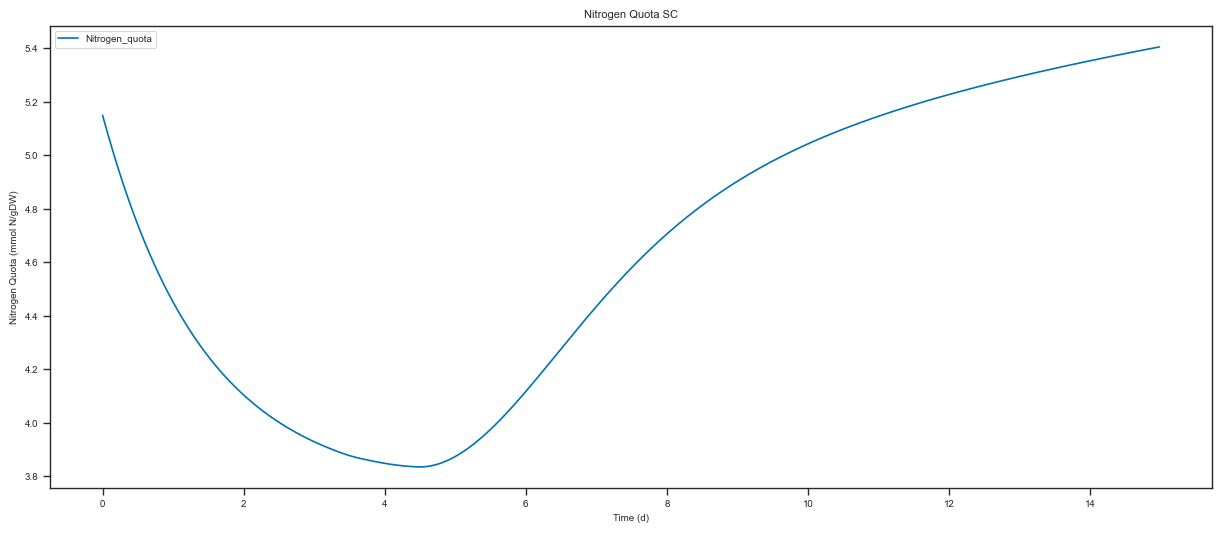

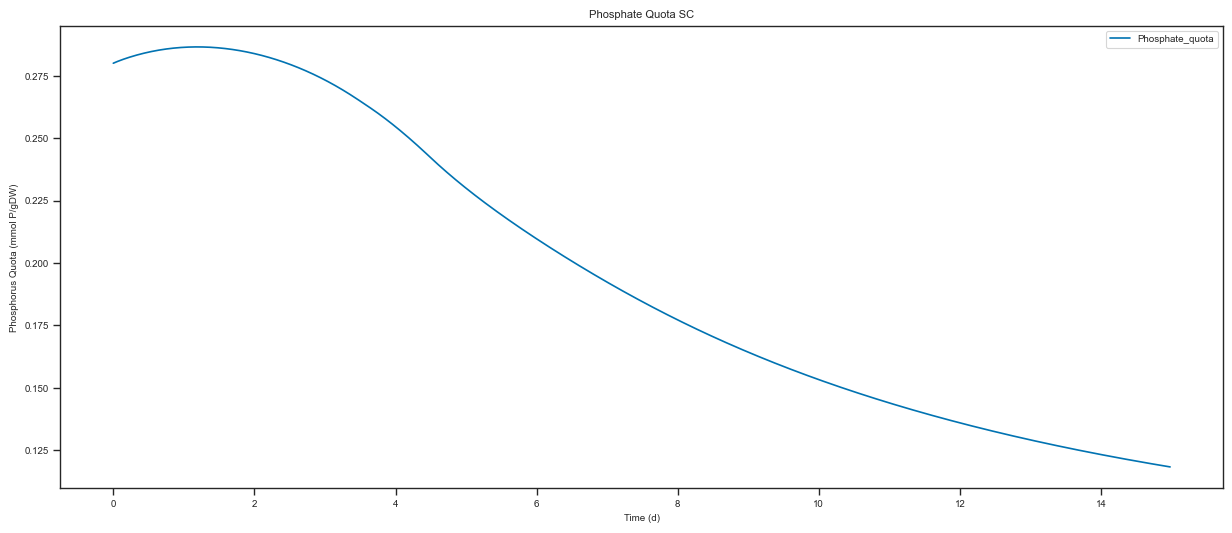

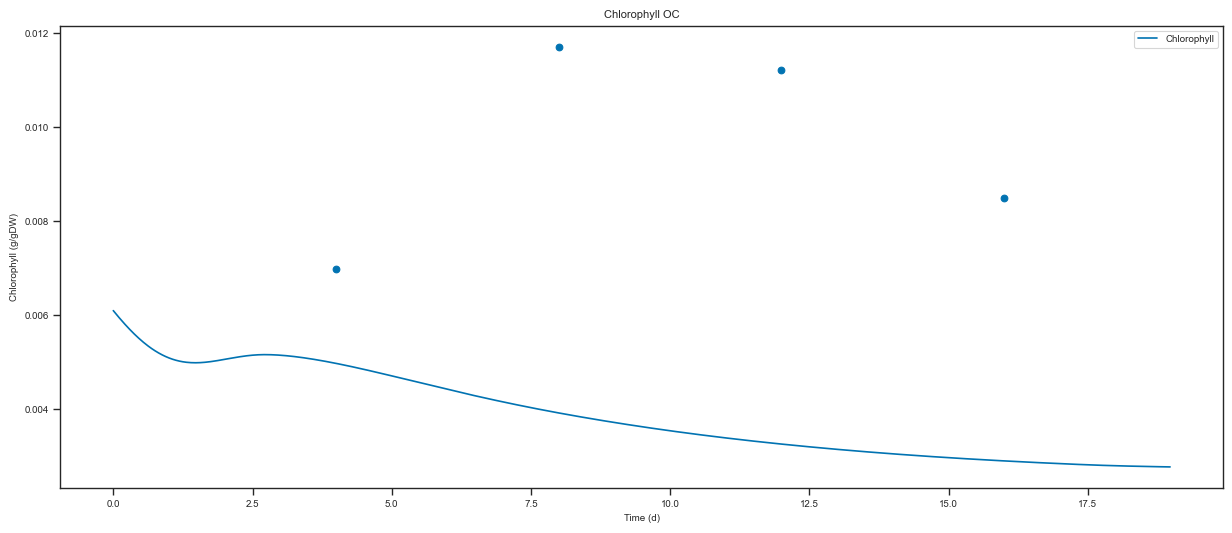

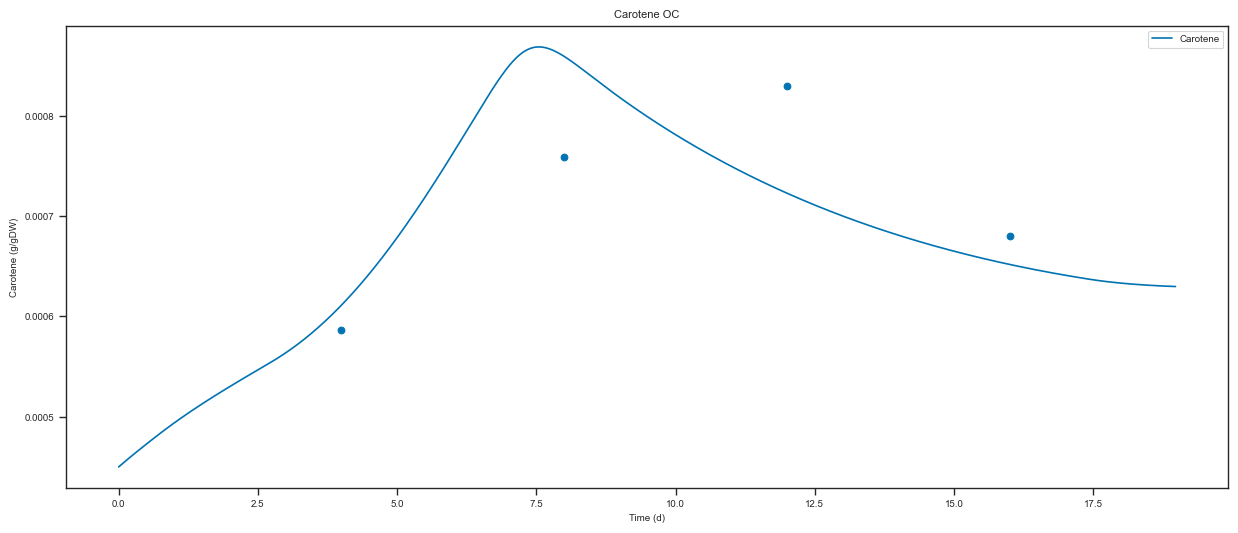

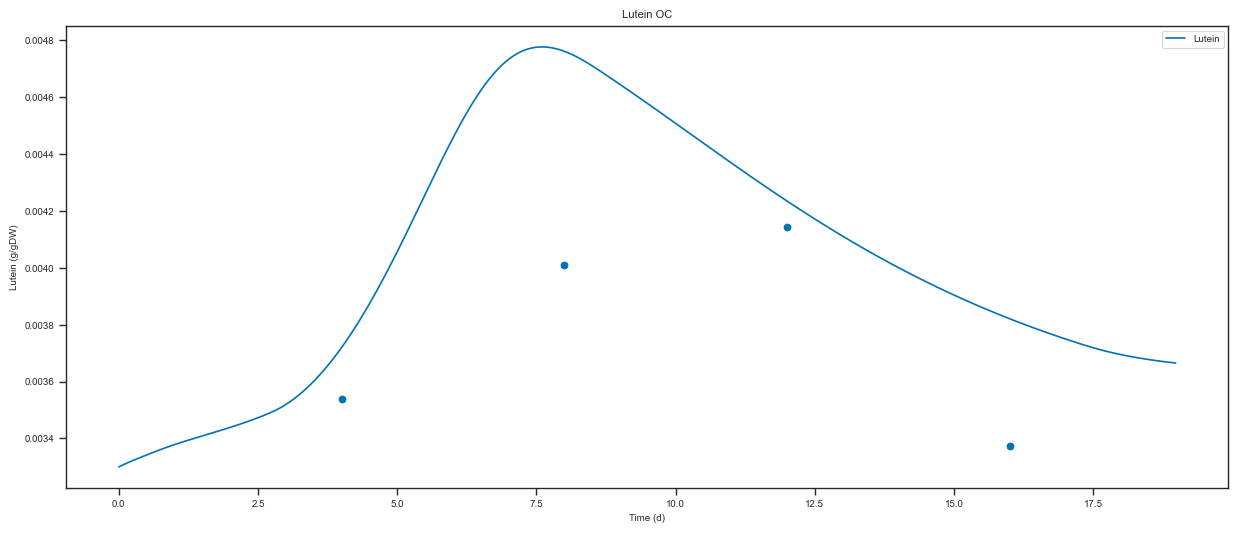

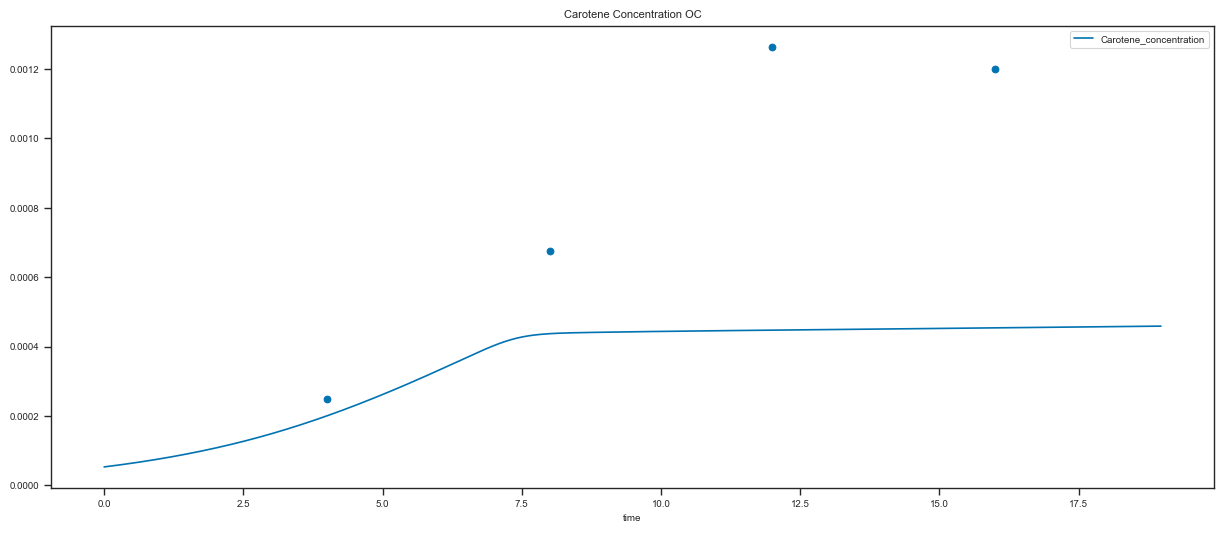

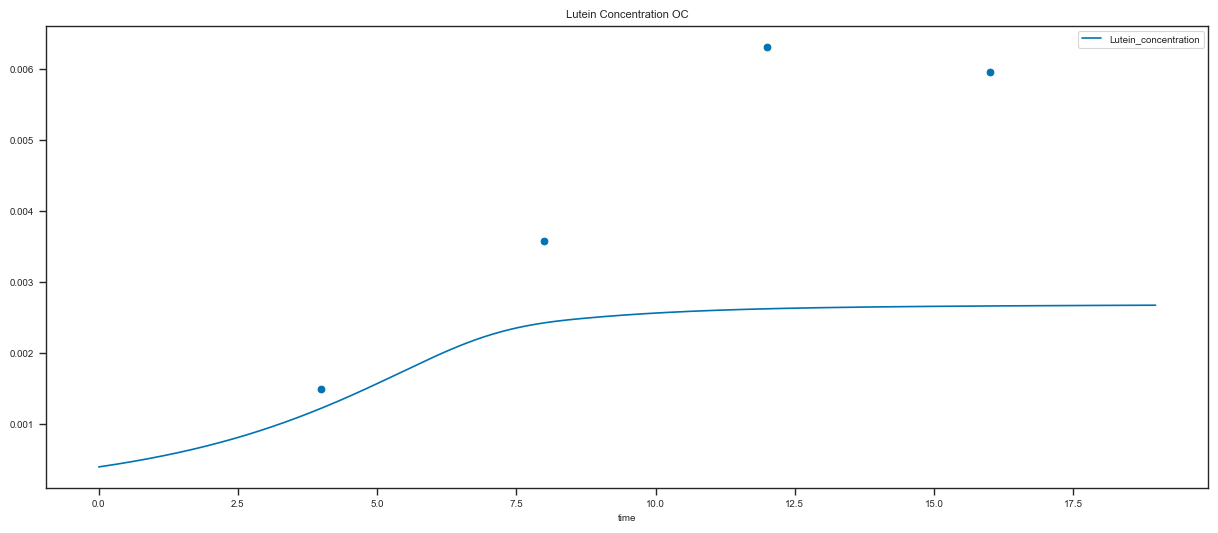

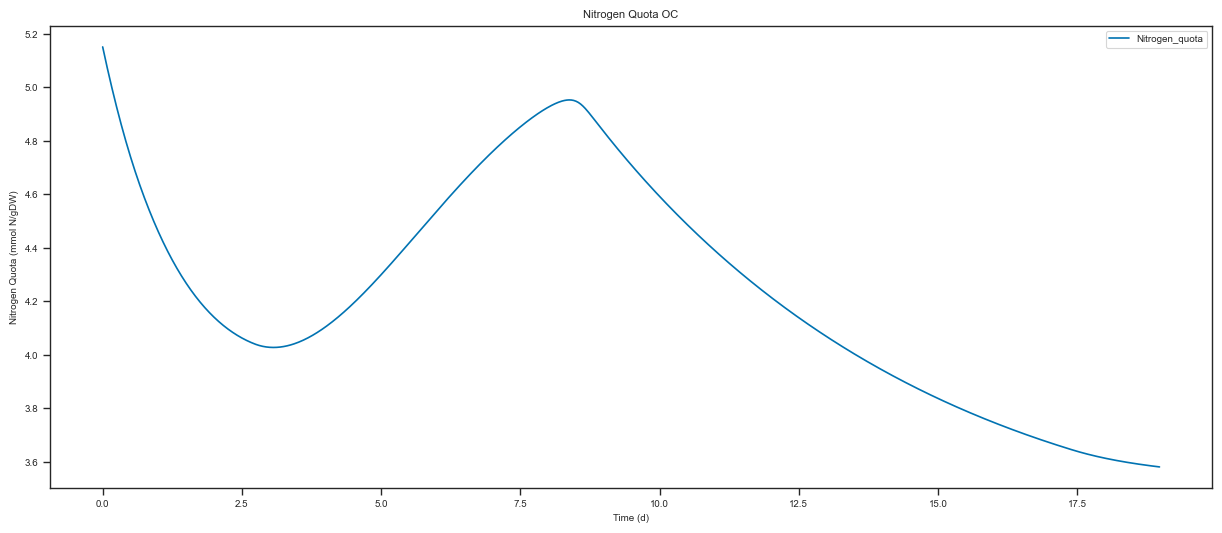

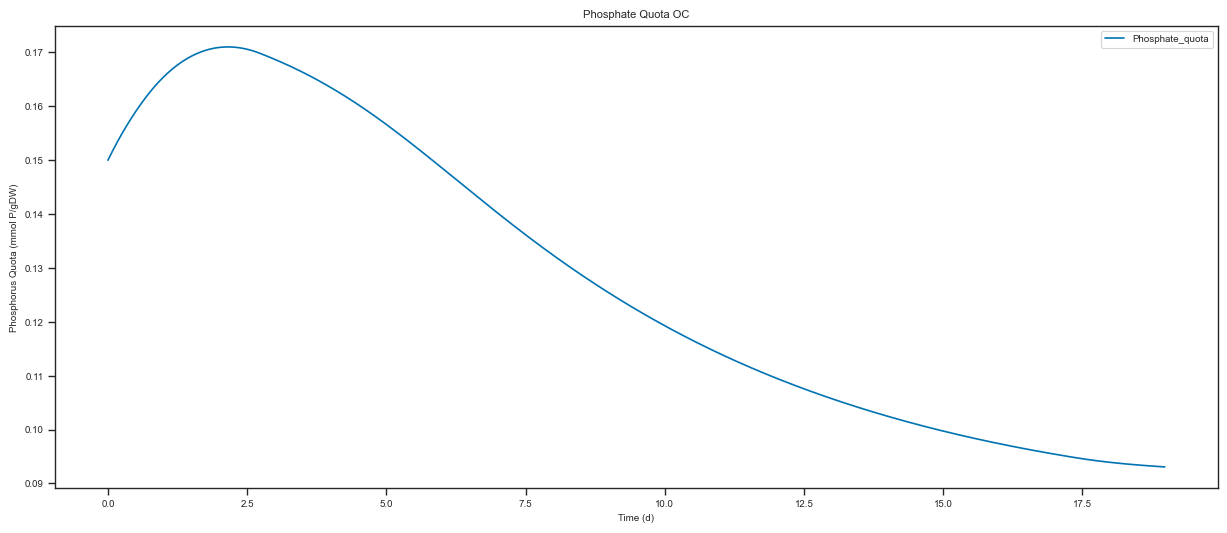

In [6]:
plot_caros()

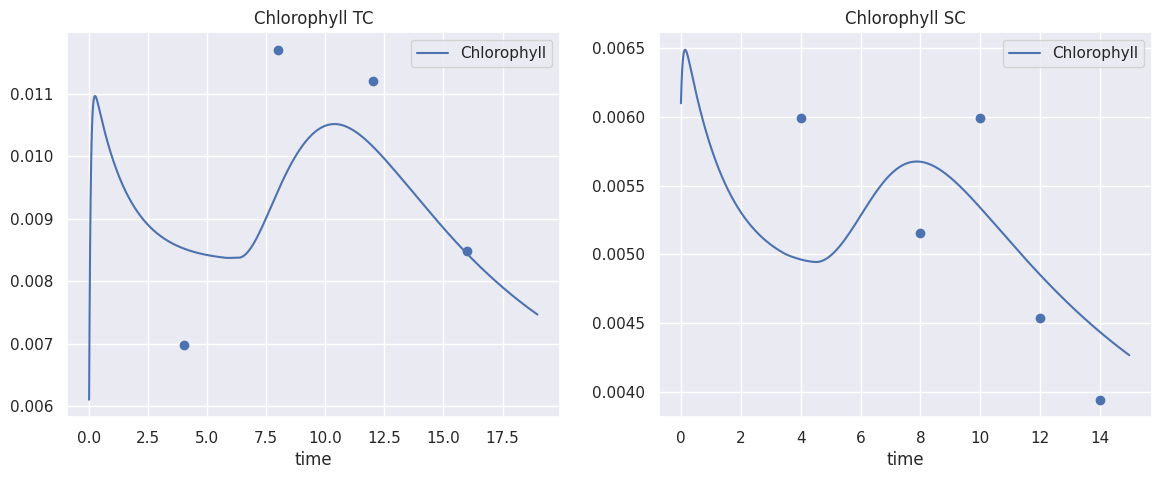

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.plot(x="time", y="Chlorophyll", title="Chlorophyll TC", ax=ax1)
axs.scatter(list(chl_tc.keys()), list(chl_tc.values()))

axs = concentrations_sc.plot(x="time", y="Chlorophyll", title="Chlorophyll SC", ax=ax2)
axs.scatter(list(chl_sc.keys()), list(chl_sc.values()))
plt.show()

In [3]:
res = (evaluate_trial(initial_parameters, condition = "TC") + evaluate_trial(initial_parameters, condition = "SC"))
res

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

0.401

In [8]:
evaluate_trial(initial_parameters, condition = "SC")

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

0.401

In [9]:
evaluate_trial(initial_parameters, condition = "TC")

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

0.459

In [52]:
concentrations_tc['Chlorophyll'][0] / (3.15* 14.01/1000)

0.13142539909135198

In [5]:
concentrations_tc.plot(x='time', y='wchl_wn')

KeyError: 'wchl_wn'

<Axes: xlabel='time'>

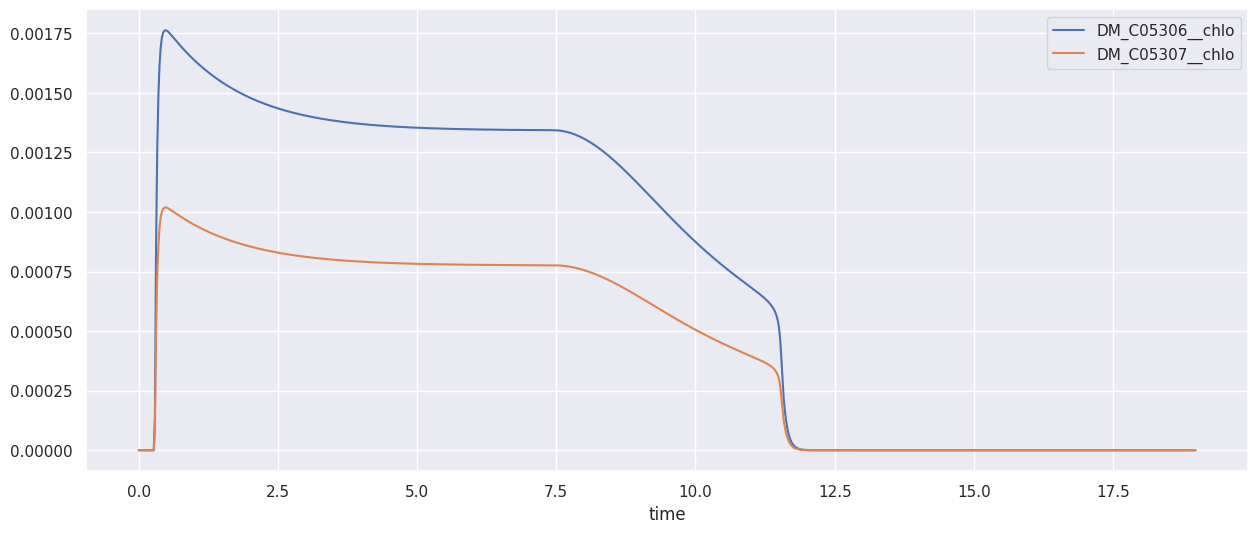

In [4]:
trajectories_tc.plot(x='time', y=["DM_C05306__chlo", "DM_C05307__chlo"])

<Axes: xlabel='time'>

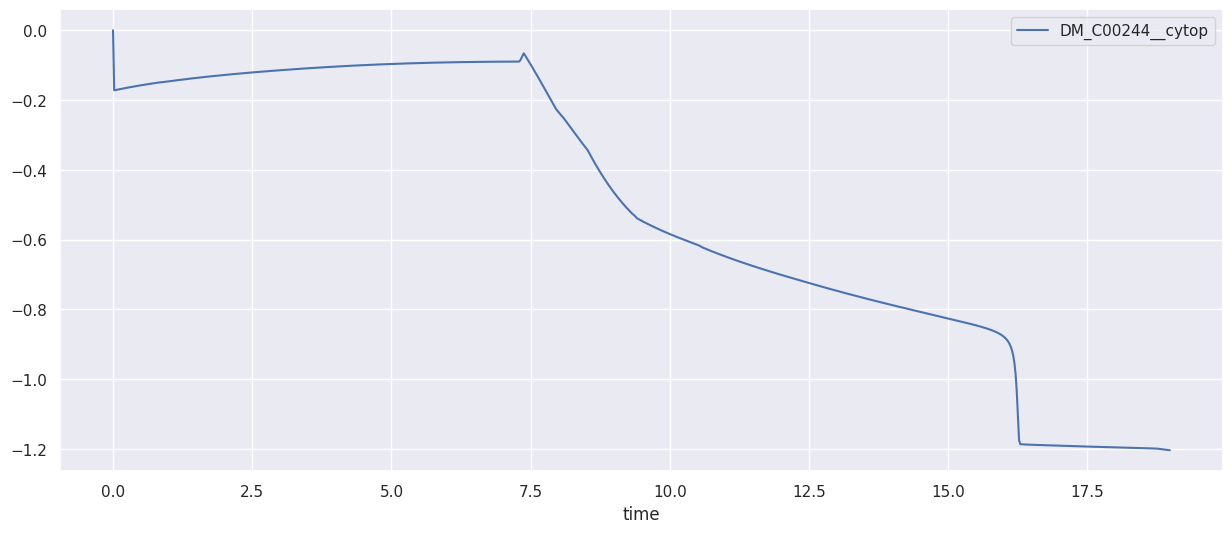

In [13]:
trajectories_tc.plot(x='time', y=["DM_C00244__cytop"])

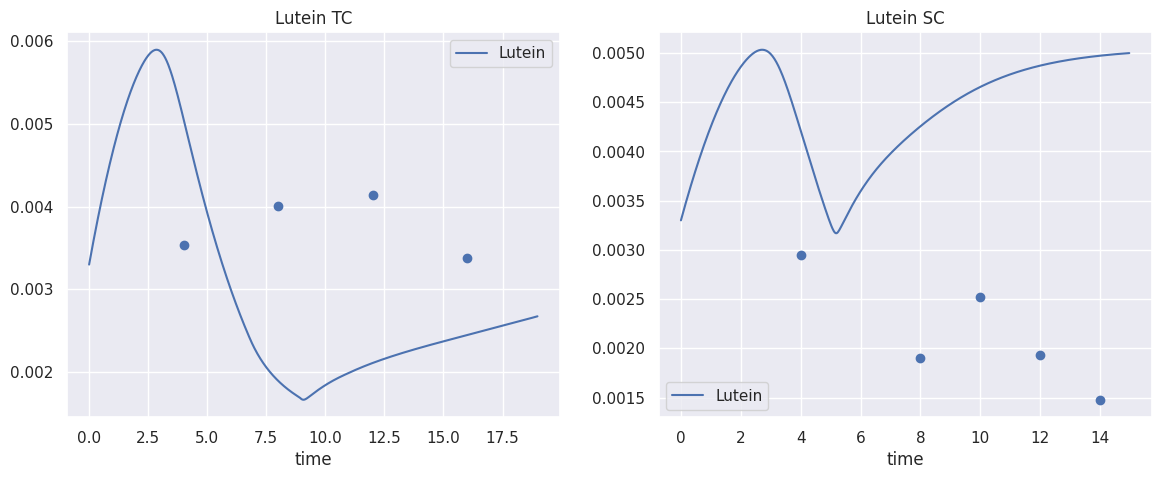

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.plot(x="time", y="Lutein", title="Lutein TC", ax=ax1)
axs.scatter(list(lut_exp_tc.keys()), list(lut_exp_tc.values()))

axs = concentrations_sc.plot(x="time", y="Lutein", title="Lutein SC", ax=ax2)
axs.scatter(list(lut_exp_sc.keys()), list(lut_exp_sc.values()))
plt.show()

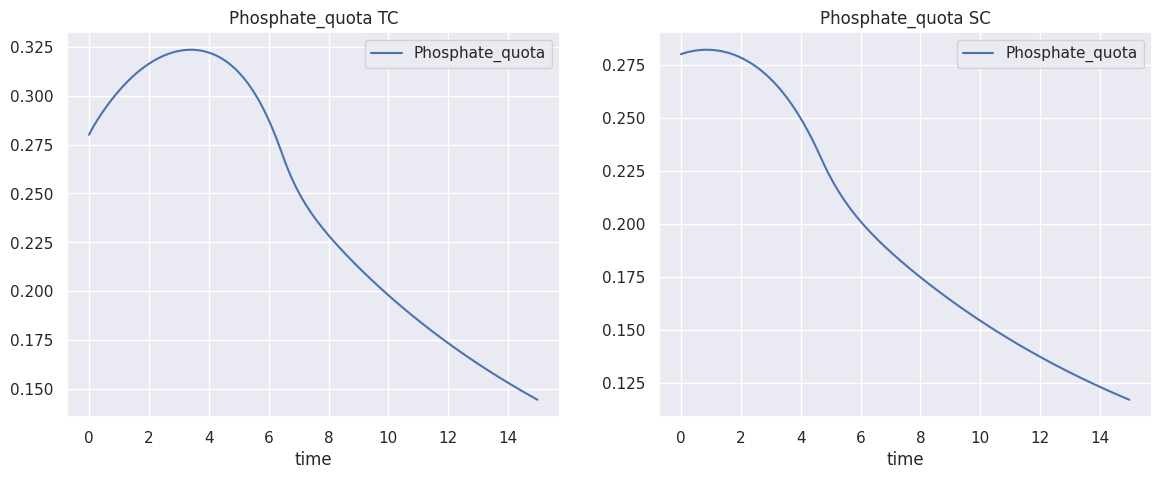

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.loc[concentrations_tc.time < 15].plot(x="time", y="Phosphate_quota", title="Phosphate_quota OC", ax=ax1)

axs = concentrations_sc.plot(x="time", y="Phosphate_quota", title="Phosphate_quota SC", ax=ax2)
plt.show()

In [35]:
concentrations_sc_tmp = concentrations_sc.add_suffix(" SC")
concentrations_oc_tmp = concentrations_tc.add_suffix(" OC")
total = pd.concat([concentrations_oc_tmp, concentrations_sc_tmp], axis=1)
total['time'] = total["time OC"]
total["P quota OC"] = total["Phosphate_quota OC"]
total["P quota SC"] = total["Phosphate_quota SC"]
total["N quota OC"] = total["Nitrogen_quota OC"]
total["N quota SC"] = total["Nitrogen_quota SC"]

In [21]:
total.head()

time OC  ActiveBiomass OC  Biomass OC  Carotene OC  Chlorophyll OC  \
0  0.000000          0.109404    0.118013     0.000450        0.006100   
1  0.020833          0.109954    0.118666     0.000456        0.007088   
2  0.041667          0.110554    0.119338     0.000461        0.007811   
3  0.062500          0.111191    0.120026     0.000466        0.008338   
4  0.083333          0.111857    0.120726     0.000472        0.008722   

   Light OC  Lutein OC  Nitrate OC  Nitrogen_quota OC  Phosphate OC  ...  \
0       0.0   0.003300    7.500000           5.150000      0.200000  ...   
1       0.0   0.003303    7.497599           5.141908      0.199735  ...   
2       0.0   0.003307    7.495176           5.133263      0.199468  ...   
3       0.0   0.003309    7.492730           5.124246      0.199200  ...   
4       0.0   0.003312    7.490261           5.114994      0.198930  ...   

   Phosphate_quota SC  Starch SC  Starch_concentration SC    TAG SC  \
0            0.280000   0.050000                 0.006102  0.013100   
1            0.280116   0.049513                 0.006078  0.013022   
2            0.280224   0.049029                 0.006055  0.012945   
3            0.280327   0.048548                 0.006032  0.012867   
4            0.280425   0.048070                 0.006008  0.012790   

   Protein SC  Carbohydrate SC  Lipid SC  Chlorophyll_concentration SC  \
0    0.151526         0.461003  0.103375                      0.000744   
1    0.151602         0.461234  0.103427                      0.000762   
2    0.151683         0.461479  0.103482                      0.000776   
3    0.151767         0.461735  0.103539                      0.000788   
4    0.151853         0.461997  0.103598                      0.000797   

   Carotene_concentration SC  Lutein_concentration SC  
0                   0.000055                 0.000403  
1                   0.000055                 0.000404  
2                   0.000056                 0.000405  
3                   0.000057                 0.000406  
4                   0.000057                 0.000408  

[5 rows x 40 columns]

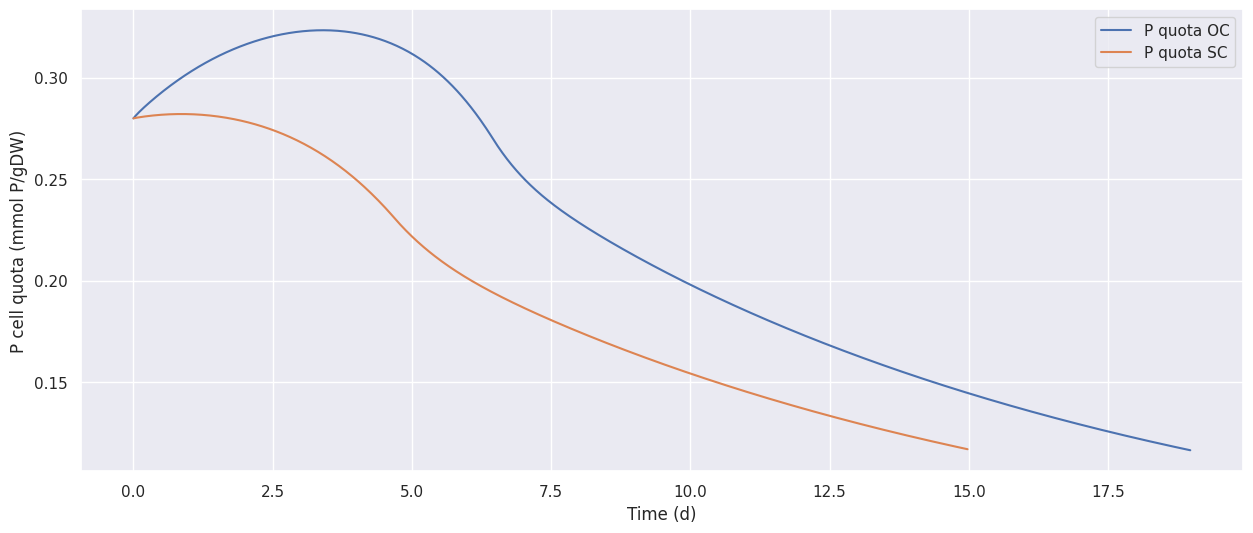

In [34]:
axs=total.plot(x="time", y=["P quota OC", "P quota SC"])
axs.set_ylabel("P cell quota (mmol P/gDW)")
axs.set_xlabel("Time (d)")
plt.savefig("/home/ecunha/dynamic_model/p_quota.png", bbox_inches='tight')

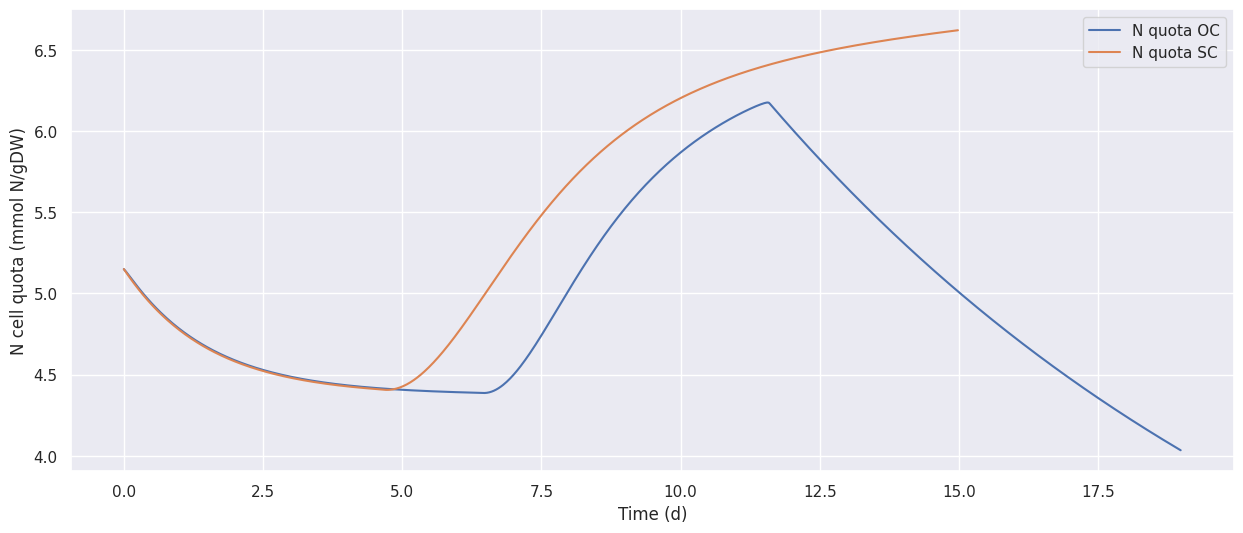

In [37]:
axs=total.plot(x="time", y=["N quota OC", "N quota SC"])
axs.set_ylabel("N cell quota (mmol N/gDW)")
axs.set_xlabel("Time (d)")
plt.savefig("/home/ecunha/dynamic_model/n_quota.png", bbox_inches='tight')

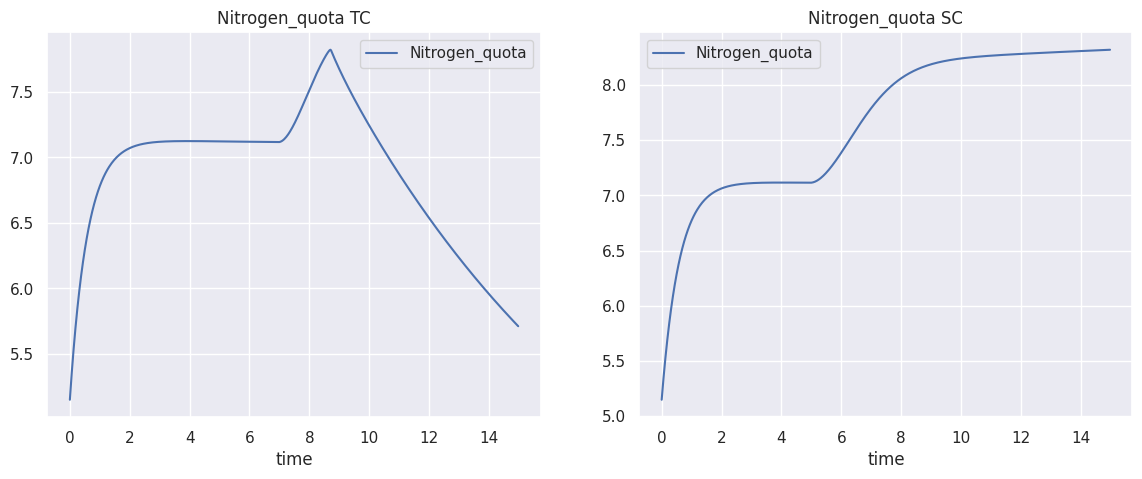

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.loc[concentrations_tc.time < 15].plot(x="time", y="Nitrogen_quota", title="Nitrogen_quota TC", ax=ax1)

axs = concentrations_sc.plot(x="time", y="Nitrogen_quota", title="Nitrogen_quota SC", ax=ax2)
plt.show()

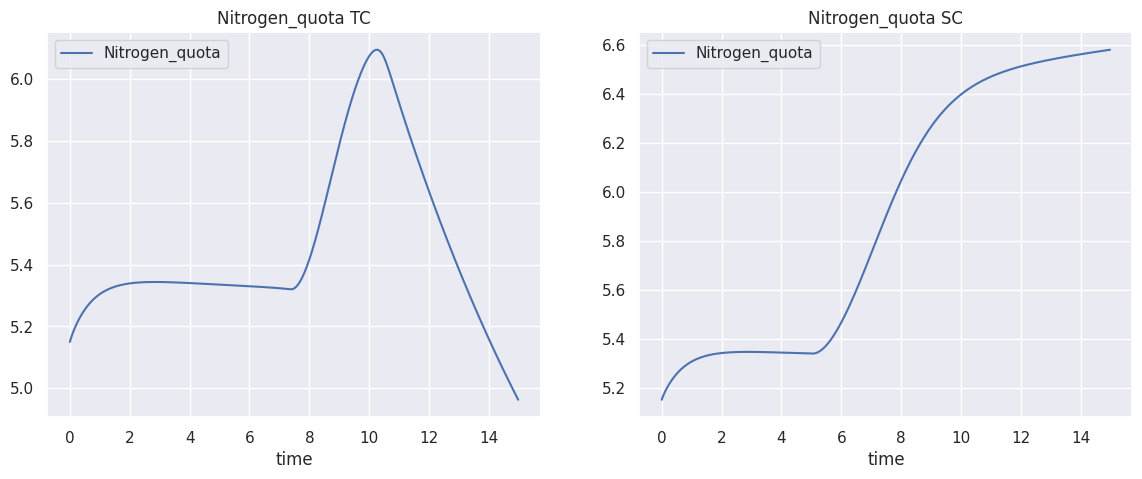

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.loc[concentrations_tc.time < 15].plot(x="time", y="Nitrogen_quota", title="Nitrogen_quota TC", ax=ax1)

axs = concentrations_sc.plot(x="time", y="Nitrogen_quota", title="Nitrogen_quota SC", ax=ax2)
plt.show()

In [7]:
def get_rmse(experimental, simulated):
    rmse = 0
    number_of_points = len(experimental)
    if simulated.shape[0] < experimental.shape[0]:
        return 1000, number_of_points

    try:
        # Remove NaN values from experimental data
        experimental.dropna(inplace=True)

        # Intersect indices to ensure both datasets match
        intersection = [e for e in simulated.index if e in experimental.index]
        simulated = simulated.loc[intersection]
        experimental = experimental.loc[intersection]

        # Calculate the squared error
        squared_error = np.square((experimental - simulated) / experimental)

        # Calculate RMSE
        rmse = np.sqrt(squared_error.mean())

        # Update number of points
        number_of_points = len(experimental)

    except Exception as e:
        print(e)
        print(f"Experimental values:\n{experimental}")
        print(f"Simulated values:\n{simulated}")

    # Handle any potential errors or non-number results
    if not isinstance(rmse, numbers.Number):
        print(f"RMSE:\n{rmse}")
        print(f"Experimental values:\n{experimental}")
        print(f"Simulated values:\n{simulated}")

    if np.isnan(rmse):
        print("NaN found!!")
        print(f"Experimental values:\n{experimental}")
        print(f"Simulated values:\n{simulated}")
        rmse = 100

    return rmse, number_of_points
def evaluate_trial(parameters, create_plots=False, condition=None):
    """
    Evaluates a trial.
    Parameters
    ----------
    parameters (dict): Dictionary with the parameters to use in the model.
    create_plots (bool): Whether to create plots or not.
    condition (str): Condition to create the model for.

    Returns (float): The total error of the trial.
    -------

    """
    # print(f"Trial: {condition}\n")
    total_error = 0
    total_number_of_points = 1
    mat = matrix.matrix[condition]
    mat['Time (d)'] = [round(e, 2) for e in mat.index.astype(float)]
    try:
        concentrations, trajectories = create_dfba_model(condition, parameters, create_plots)
        # to_fit = {"Biomass": "DW", "Carotene": "Caro", "Chlorophyll": "Chl", "Starch": "Starch", "Nitrate": "NO3", 'Protein': 'Protein', 'Carbohydrate': 'Carbohydrate', 'Lipid': 'Lipid',
        #           "Chlorophyll_concentration": "Chlorophyll_concentration", "Carotene_concentration": "Caro_concentration"
        #           }  #
        to_fit = {
            # "Biomass": "DW",
            # 'Lipid': 'Lipid', 'Protein': 'Protein', 'Carbohydrate': 'Carbohydrate',
            # "Carotene": "Caro",
            "Chlorophyll": "Chl",
            # "Lutein": "Lutein",
            # "Chlorophyll_concentration": "Chlorophyll_concentration",
            # "Carotene_concentration": "Caro_concentration",
            # "Lutein_concentration": "Lutein_concentration"
        }
        experimental_time = np.array(mat["Time (d)"])
        if concentrations.time.max() < experimental_time.max():
            return 1e3
        closest = get_closest(experimental_time, concentrations.time)
        at_time = concentrations.loc[concentrations.time.isin(closest)]
        at_time.reset_index(inplace=True, drop=True)
        mat.reset_index(inplace=True, drop=True)
        for simulation_name, experimental_name in to_fit.items():
            if experimental_name in mat.columns:
                experimental = mat[experimental_name]
                simulated = at_time[simulation_name]
                relative_error, number_of_points = get_rmse(experimental, simulated)
                total_error += relative_error
                total_number_of_points += number_of_points
                # print(f"Total error for {simulation_name}:\n{total_error}")
    except Exception as e:
        print(e)
        with open(f"{RESULTS_PATH}/logs/temp_error.log", "a") as file:
            file.write(f"{e}\n")
        total_error = 1e3
    return round(total_error, 3)

In [58]:
def micmen(S, Km, Vmax):
    return Vmax* (S/(S+Km))
micmen(10, 0.01, 0.35)

0.34965034965034963

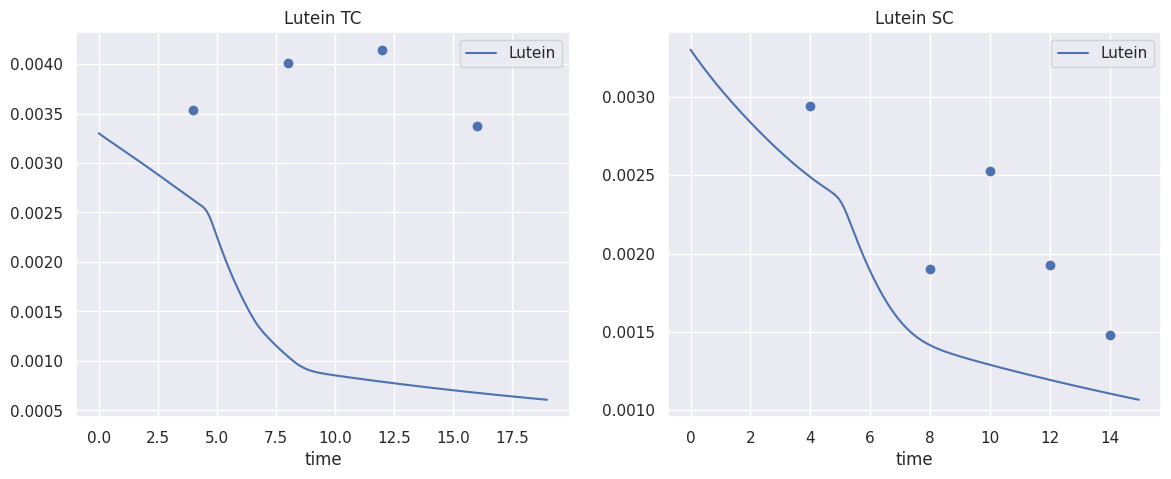

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.plot(x="time", y="Lutein", title="Lutein TC", ax=ax1)
axs.scatter(list(lut_exp_tc.keys()), list(lut_exp_tc.values()))

axs = concentrations_sc.plot(x="time", y="Lutein", title="Lutein SC", ax=ax2)
axs.scatter(list(lut_exp_sc.keys()), list(lut_exp_sc.values()))
plt.show()

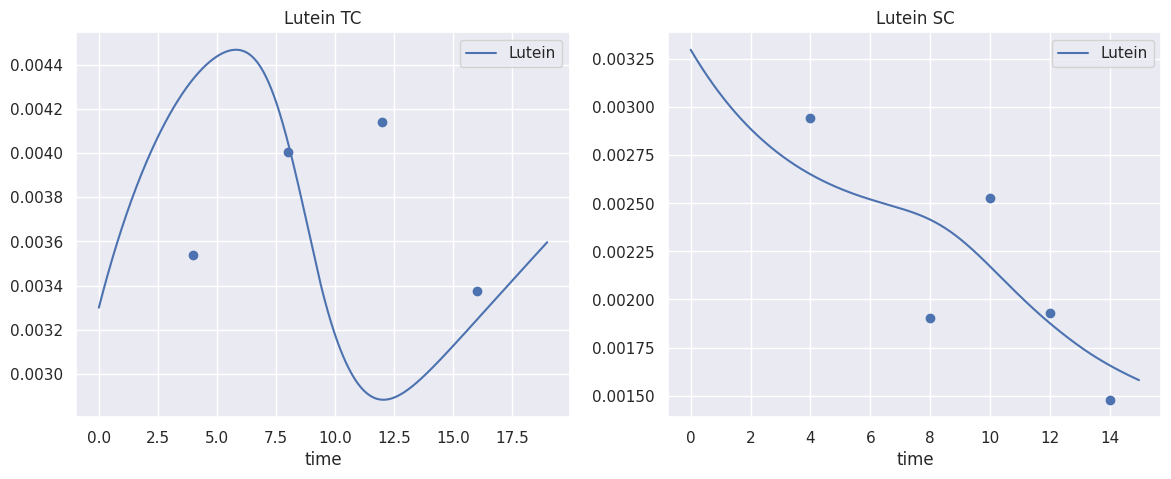

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.plot(x="time", y="Lutein", title="Lutein TC", ax=ax1)
axs.scatter(list(lut_exp_tc.keys()), list(lut_exp_tc.values()))

axs = concentrations_sc.plot(x="time", y="Lutein", title="Lutein SC", ax=ax2)
axs.scatter(list(lut_exp_sc.keys()), list(lut_exp_sc.values()))
plt.show()

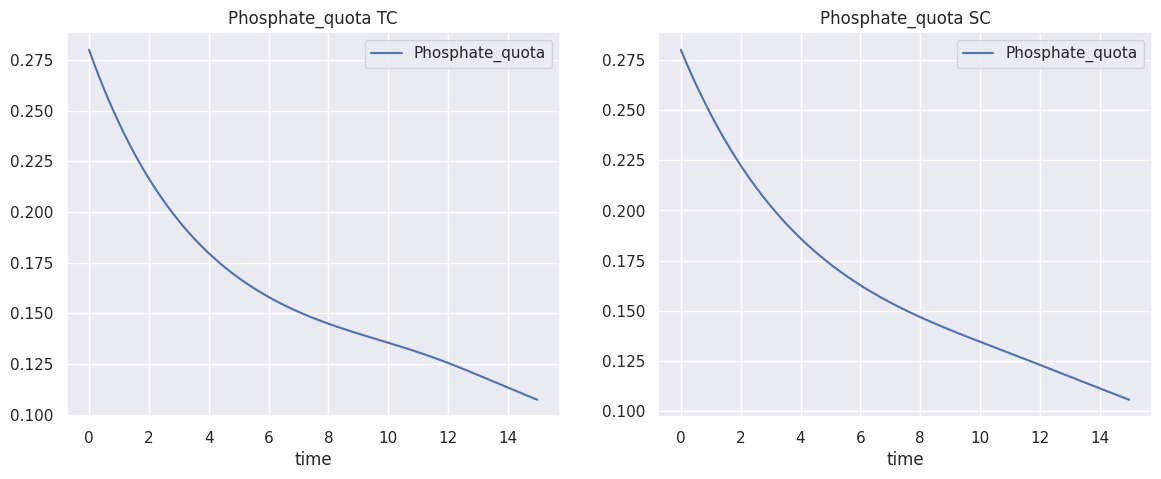

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
axs = concentrations_tc.loc[concentrations_tc.time < 15].plot(x="time", y="Phosphate_quota", title="Phosphate_quota TC", ax=ax1)

axs = concentrations_sc.plot(x="time", y="Phosphate_quota", title="Phosphate_quota SC", ax=ax2)
plt.show()

In [9]:
res = (evaluate_trial(initial_parameters, condition = "TC") + evaluate_trial(initial_parameters, condition = "SC"))
res

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

1.935

In [62]:
trajectories_tc

time  e_ActiveBiomass__cytop  EX_C00009__dra  DM_C02094__chlo  \
0     0.000000                0.000000    0.000000e+00         0.000000   
1     0.020833                0.467840   -6.666667e-02         0.002773   
2     0.041667                0.467717   -6.664834e-02         0.002773   
3     0.062500                0.467594   -6.662982e-02         0.002773   
4     0.083333                0.467469   -6.661110e-02         0.002773   
..         ...                     ...             ...              ...   
907  18.895833                0.057662   -3.909388e-11         0.000049   
908  18.916667                0.057655   -3.714147e-11         0.000049   
909  18.937500                0.057647   -3.528433e-11         0.000049   
910  18.958333                0.057640   -3.351792e-11         0.000049   
911  18.979167                0.057632   -3.183792e-11         0.000049   

     EX_C00244__dra  EX_C00011__dra  DM_C00404__vacu  DM_C00244__cytop  \
0          0.000000        0.000000         0.000000          0.000000   
1         -0.199343      -25.167470        -0.000406         -2.555128   
2         -0.200686      -25.165148        -0.000406         -2.553542   
3         -0.202014      -25.162802        -0.000405         -2.551970   
4         -0.203328      -25.160433        -0.000405         -2.550409   
..              ...             ...              ...               ...   
907       -0.257613      -21.871300        -0.000379         -1.688821   
908       -0.257512      -21.839305        -0.000379         -1.693611   
909       -0.257410      -21.807353        -0.000379         -1.698397   
910       -0.257307      -21.776087        -0.000379         -1.704839   
911       -0.257201      -21.746050        -0.000378         -1.715516   

     EX_C00205__dra  DM_C08601__chlo  
0          0.000000     0.000000e+00  
1       -369.061777     1.567534e-03  
2       -369.025559     1.565396e-03  
3       -368.988981     1.563221e-03  
4       -368.952039     1.561010e-03  
..              ...              ...  
907     -298.587250     7.634655e-16  
908     -298.225994     7.555867e-16  
909     -297.865220     7.477996e-16  
910     -297.504927     7.401029e-16  
911     -297.145115     7.324956e-16  

[912 rows x 10 columns]

In [ ]:
import itertools
v_lut_max = np.arange(0.0005, 0.01, 0.0005)
a1_lut = np.arange(1e-5, 1e-4, 1e-5)
a0p_lut = np.arange(0.005, 0.1, 0.01)
smoothing_factor_lut_p = np.arange(0, 500, 10)
combinations = itertools.product(a1_lut, a0p_lut)
min_error = 100
best = None
for i, combo in tqdm(enumerate(combinations)):
    tmp = {key: value for key, value in initial_parameters.items()}
    tmp["v_lut_max"] = combo[0]
    tmp["a1_lut"] = combo[1]
    tmp["a0p_lut"] = combo[2]
    error = evaluate_trial(tmp, condition="TC")
    if error < min_error:
        min_error = error
        best = combo
    if error < 4:
        print(combo)

0it [00:00, ?it/s]--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/

In [46]:
evaluate_trial(initial_parameters, condition="SC")

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

5.777

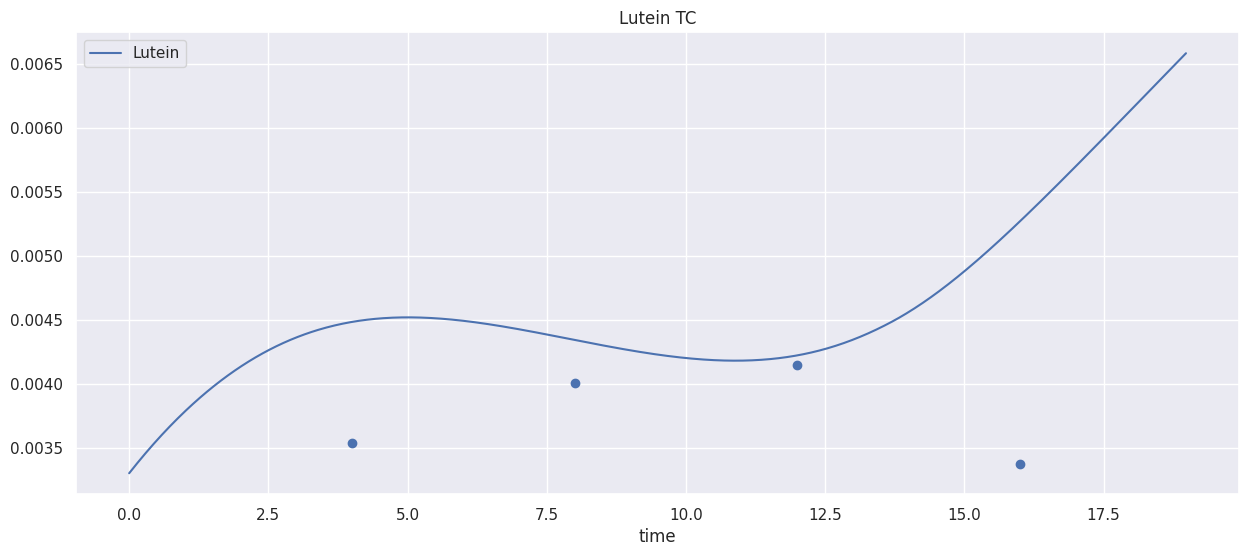

In [39]:
lut_exp = {4: 0.003536932, 8:0.004008158,
                    12: 0.004144134,  16:0.003374838}
axs = concentrations_tc.plot(x="time", y="Lutein", title="Lutein TC")
axs.scatter(list(lut_exp.keys()), list(lut_exp.values()))
plt.show()

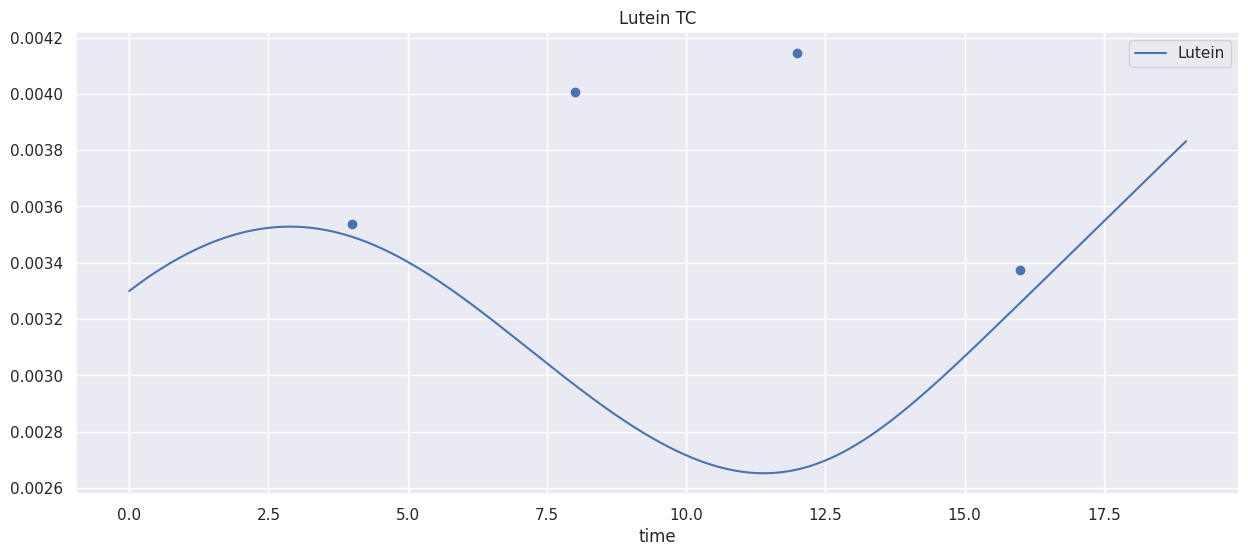

In [10]:
lut_exp = {4: 0.003536932, 8:0.004008158,
                    12: 0.004144134,  16:0.003374838}
axs = concentrations_tc.plot(x="time", y="Lutein", title="Lutein TC")
axs.scatter(list(lut_exp.keys()), list(lut_exp.values()))
plt.show()

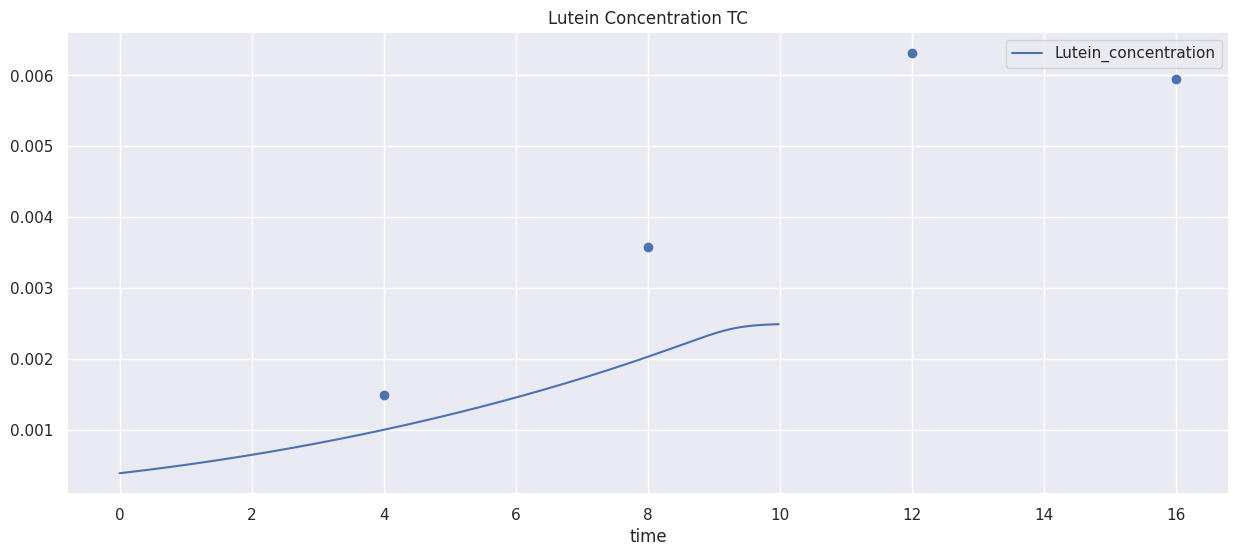

In [12]:
lut_exp = {4: 0.001494693, 8: 0.003574782,
               12: 0.006313106, 16: 0.005952564
}
axs = concentrations_tc.plot(x="time", y="Lutein_concentration", title="Lutein Concentration TC")
axs.scatter(list(lut_exp.keys()), list(lut_exp.values()))
plt.show()

In [47]:
import sympy as sp
def phi(x, rs):
    return 1 / (1 + sp.exp(-rs * x))

In [232]:
a1 =  7e-5
a0 = 0.1
pq = 0.20 * 30.7 / 1000
phi(276*a1  - a0 + pq, rs=40)

0.0482640801224185

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

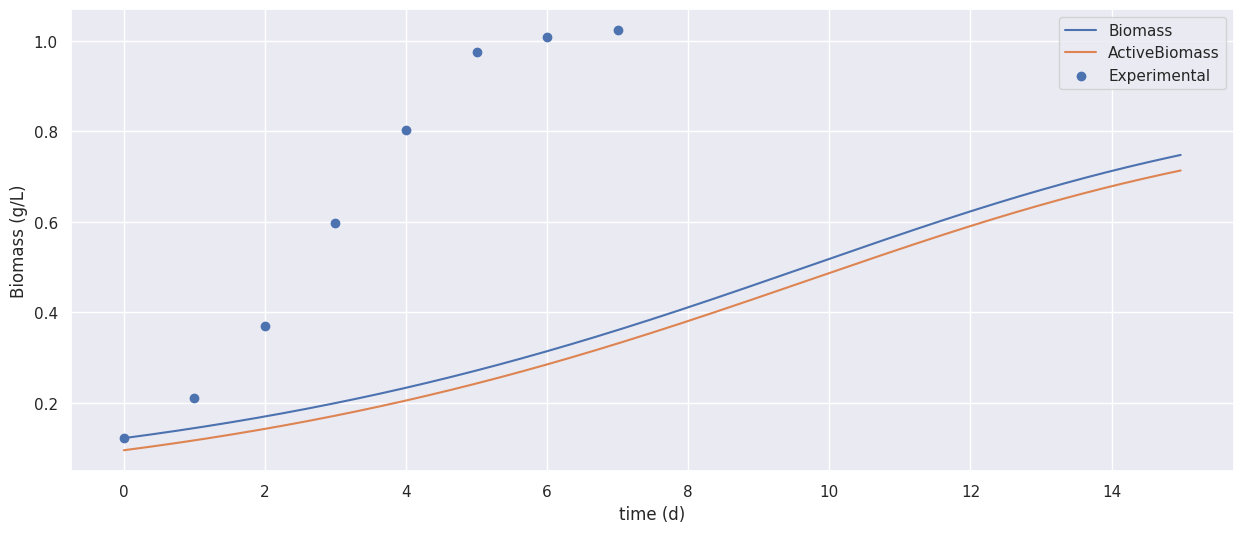

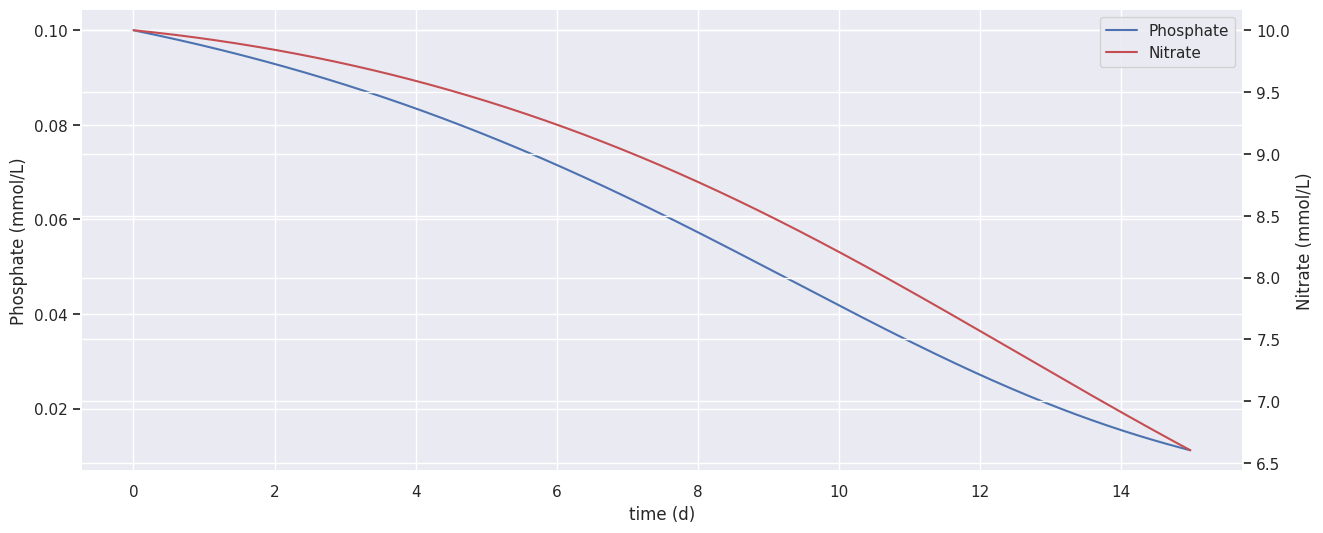

In [16]:
concentrations, trajectories = create_dfba_model("SC", initial_parameters, True)

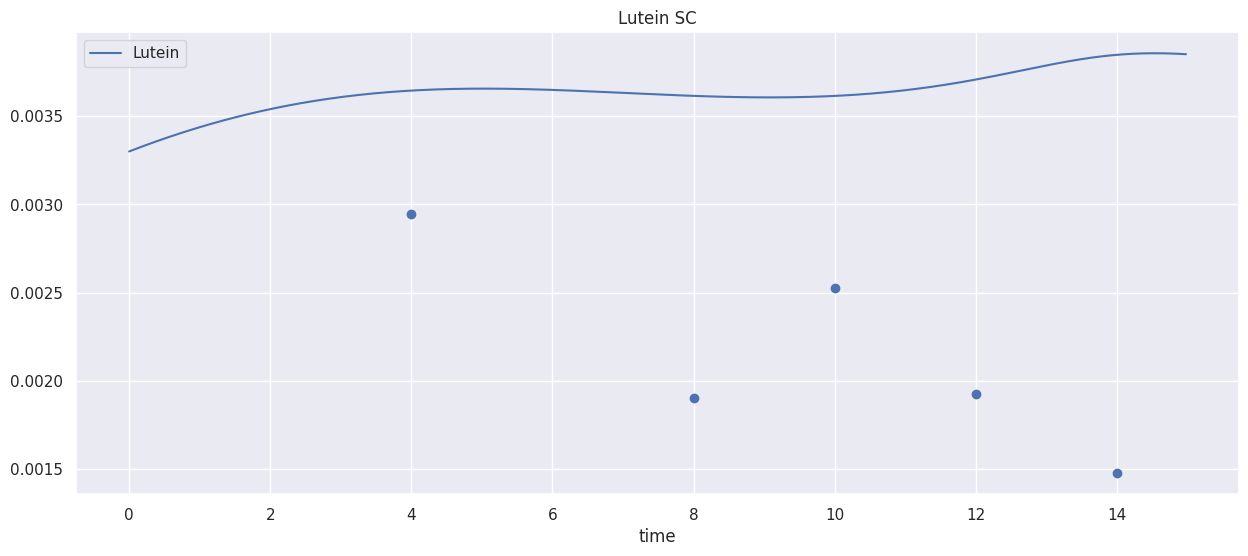

In [13]:
lut_exp = {4: 0.002943876
, 8: 0.001903962
, 10: 0.002526625
, 12: 0.001929135
, 14: 0.001478111
}
axs = concentrations_sc.plot(x="time", y="Lutein", title="Lutein SC")
axs.scatter(list(lut_exp.keys()), list(lut_exp.values()))
plt.show()

<Axes: xlabel='time'>

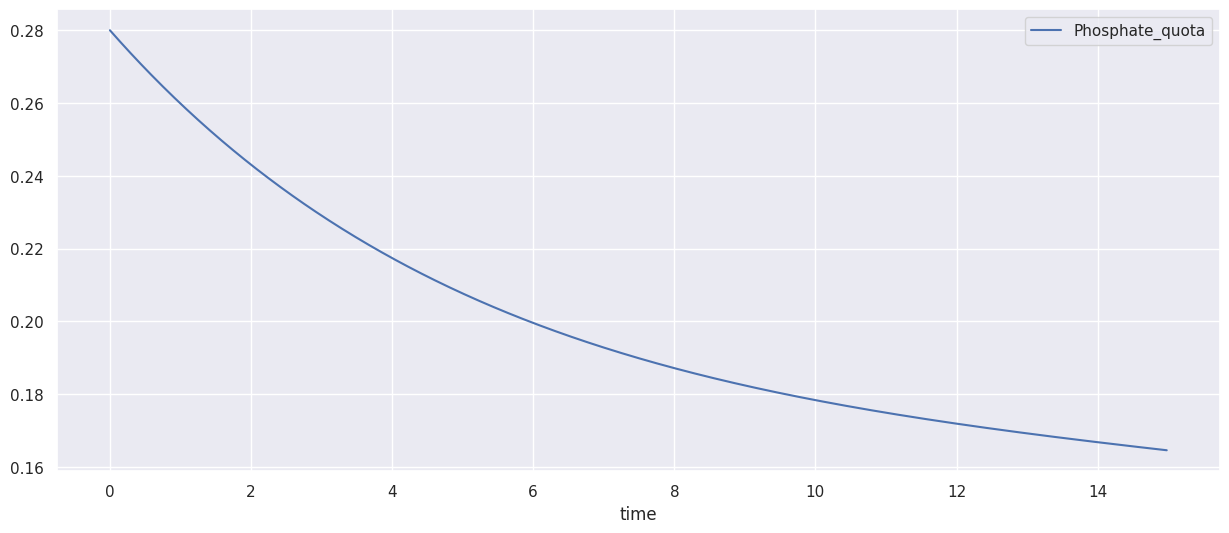

In [19]:
concentrations.plot(x='time', y='Phosphate_quota')

<Axes: xlabel='time'>

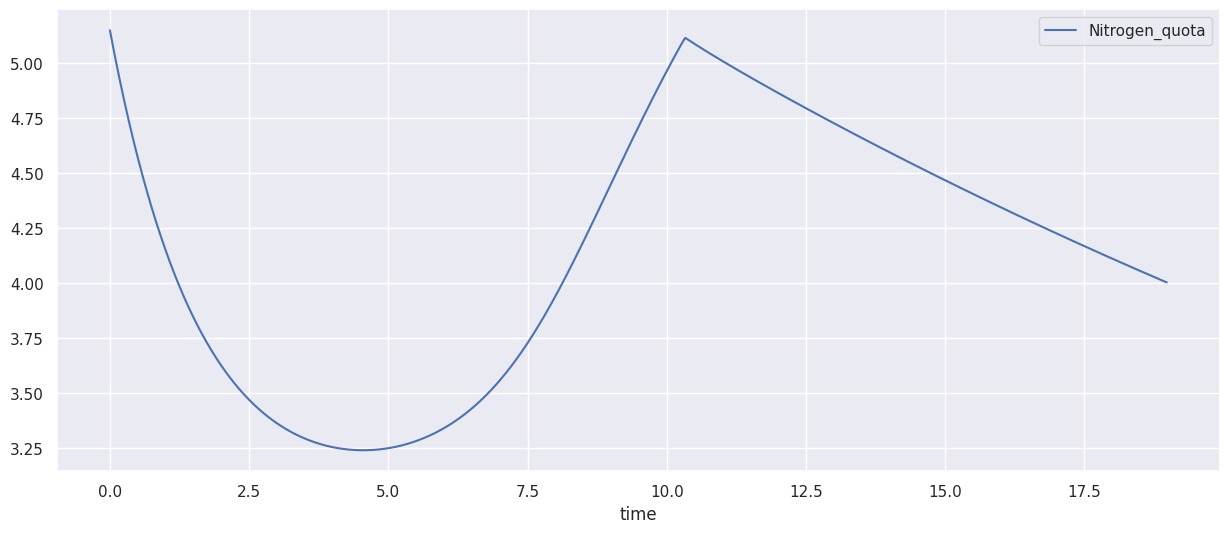

In [79]:
concentrations.plot(x='time', y='Nitrogen_quota')

<Axes: xlabel='time'>

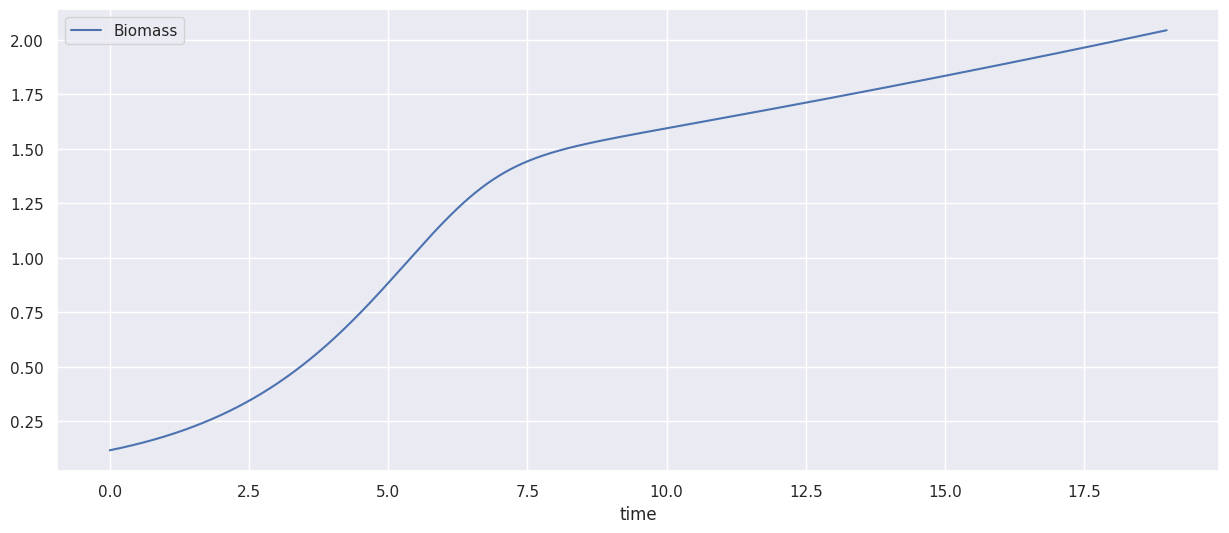

In [136]:
concentrations.plot(x="time", y="Biomass")

<Axes: >

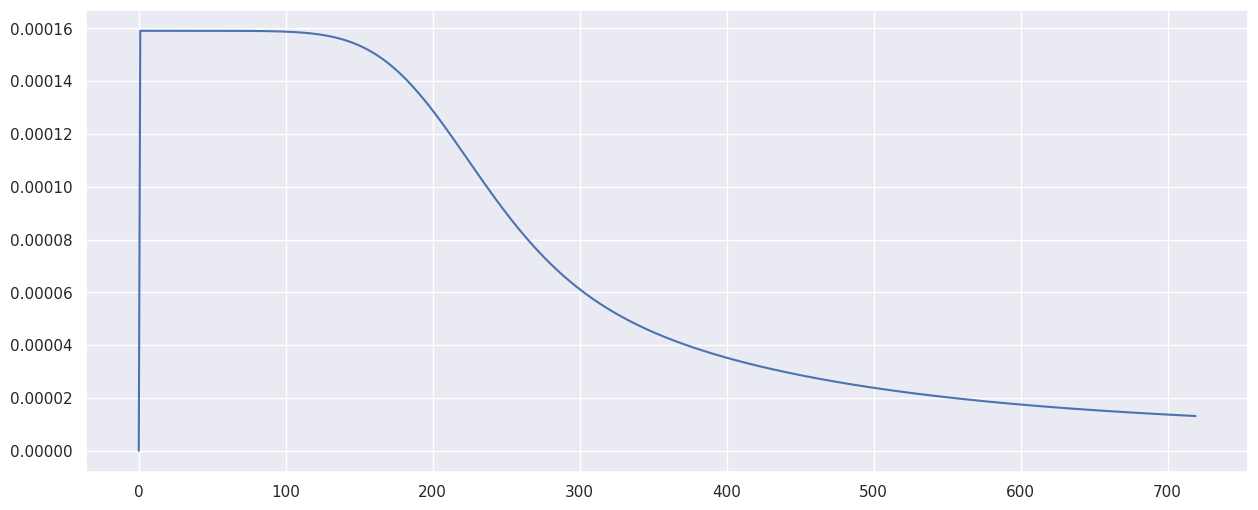

In [128]:
trajectories.DM_C02094__chlo.plot()

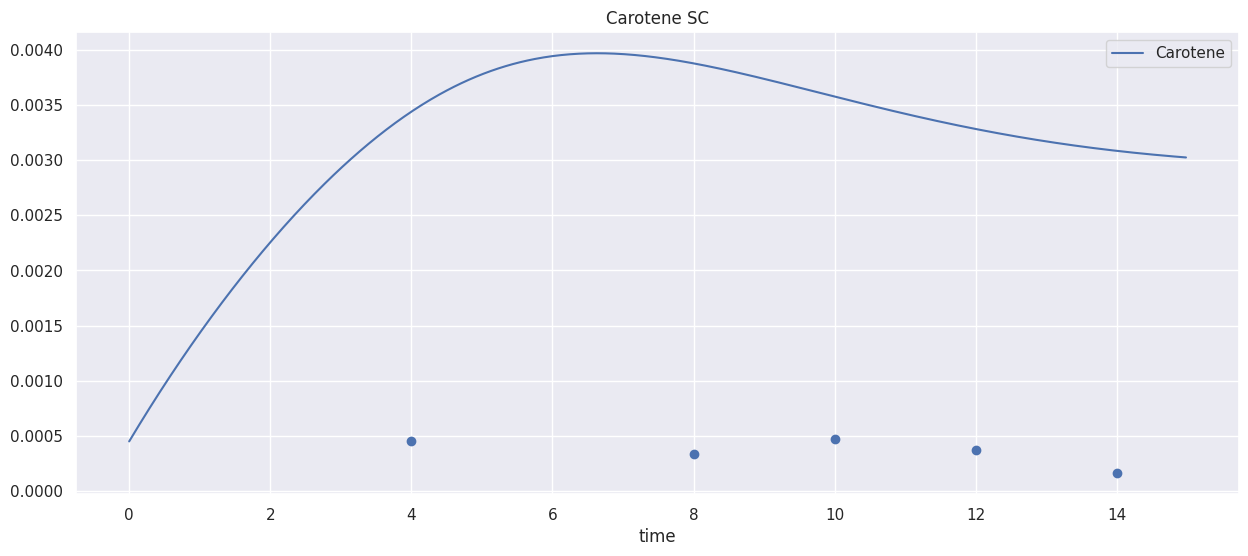

In [20]:
car_exp = {4: 0.00045116, 8: 0.000333513, 10: 0.00047447, 12: 0.000371476, 14: 0.000161355}
car_conc = {0: 4.88135E-05, 4: 0.000166591, 8: 0.000267999, 10: 0.000462569, 12: 0.000374841, 14: 0.000165156}
axs = concentrations.plot(x="time", y="Carotene", title="Carotene SC")
axs.scatter(list(car_exp.keys()), list(car_exp.values()))
plt.show()

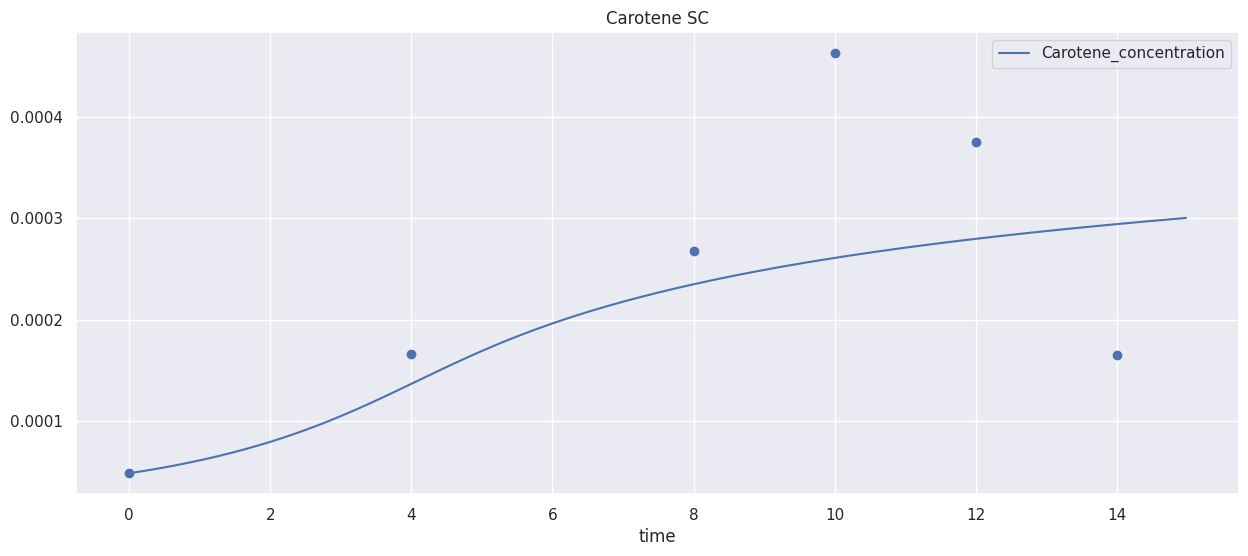

In [130]:
axs = concentrations.plot(x="time", y="Carotene_concentration", title="Carotene SC")
axs.scatter(list(car_conc.keys()), list(car_conc.values()))
plt.show()

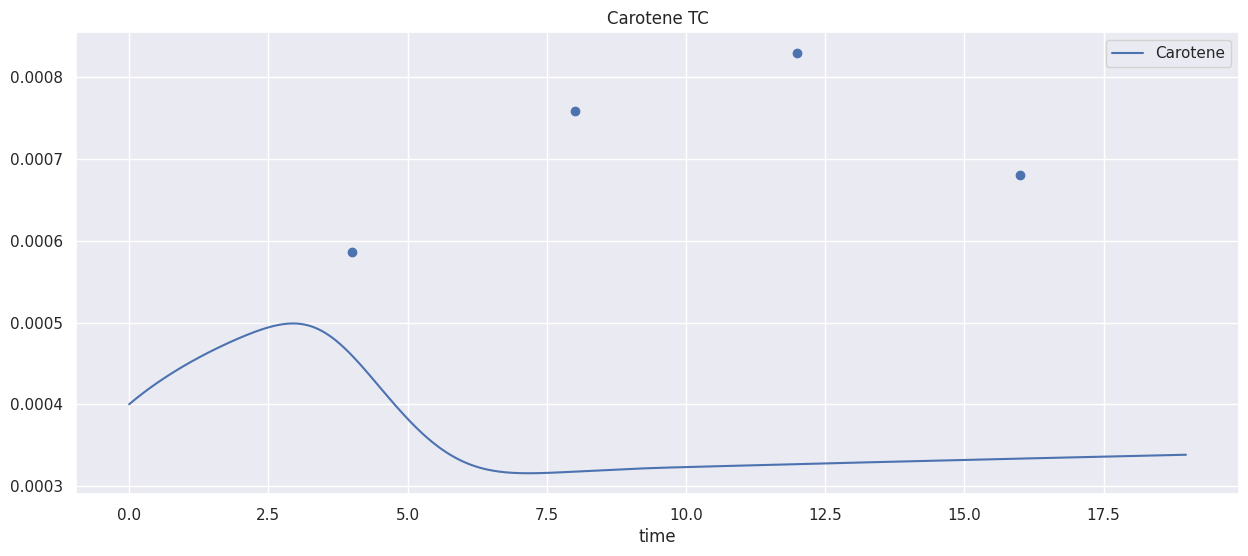

In [133]:
car_exp = {4: 0.000586728,
                8:0.000758562,
                12:0.000829533,
                16:0.000680184
}
axs = concentrations.plot(x="time", y="Carotene", title="Carotene TC")
axs.scatter(list(car_exp.keys()), list(car_exp.values()))
plt.show()

In [3]:
import json
import random
import numpy as np

# Load the initial parameters from the JSON file
initial_parameters = json.load(open("/home/ecunha/dynamic_model/data/parameters/initial_parameters.json", "r"))

# Function to generate random samples for a single parameter
def generate_random_sample(param_value):
    if isinstance(param_value, list) and len(param_value) == 2:
        # Assume the parameter is a range [min, max], generate random value in this range
        return random.uniform(param_value[0], param_value[1])
    elif isinstance(param_value, (int, float)):
        # Add some random noise (e.g., 10% variation)
        return param_value * random.uniform(0.1, 10)
    else:
        # If the parameter isn't numerical, just return it as-is
        return param_value

# Generate 100 random samples
random_samples = []
for _ in range(50):
    sample = {}
    for param, value in initial_parameters.items():
        sample[param] = generate_random_sample(value)
    random_samples.append(sample)

# Optionally, print or save the random samples
print(random_samples[:5])  # Print first 5 samples as an example

[{'ExA': 51.84782771498189, 'KNm': 0.034112252618317074, 'KPm': 0.45847659745343944, 'K_nitrogen_quota': 0.36703436736902323, 'VNmax': 13.842848002734465, 'VPmax': 0.4287996657599713, 'a0': 0.07092057897476939, 'a0p': 0.7229987825112472, 'a0p_lut': 0.02747669781210135, 'a0_lut': 0.06863823241679577, 'a1': 0.00046846735200109957, 'a1_lut': 0.0008461000642304315, 'l': 1.9517756171616676, 'light_conversion_factor': 6.461909680966403, 'ro0': 0.005223211941271633, 'ro1': 44.08045832605602, 'smoothing_factor': 187.8066377347545, 'smoothing_factor_p': 158.41594225284905, 'smoothing_factor_lut': 27.258527173295334, 'smoothing_factor_lut_p': 35.09251563694065, 'v_car_max': 0.015791192585496244, 'v_lut_max': 0.03656199255045404, 'v_nitrate_max': 10.26236078048868, 'v_polyphosphate_max': 0.0016589451987896865, 'wNmax': 96.25724686846591, 'wNmin': 9.091102062234532, 'wPmin': 0.08019631850041889, 'Kaeration': 4617.982116236728, 'lutein_aeration_exponent': 14.879342104293752, 'carotene_aeration_expo

In [ ]:
res = pd.DataFrame(random_samples)
labels = []
lut_exp = {4: 0.003536932, 8:0.004008158,
                    12: 0.004144134,  16:0.003374838}
for sample in random_samples:
    concentrations_tc, trajectories_tc = create_dfba_model("TC", sample, False)
    to_fit = ['time', 'Lutein']
    experimental_time = np.array(list(lut_exp.keys()))
    closest = get_closest(experimental_time, concentrations_tc.time)
    at_time = concentrations_tc.loc[concentrations_tc.time.isin(closest)][to_fit].T
    at_time.columns = at_time.loc['time']
    at_time.drop(['time'], inplace=True)
    labels.append(at_time.iloc[0].values.tolist())

--- Logging error ---
Traceback (most recent call last):
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/logging/__init__.py", line 1088, in emit
    stream.write(msg + self.terminator)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/tempfile.py", line 489, in func_wrapper
    return func(*args, **kwargs)
ValueError: I/O operation on closed file.
Call stack:
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-pac

In [ ]:
labels_df = pd.DataFrame(labels)
labels_df.columns = [f"y_{i}" for i in range(len(labels_df.columns))]
labels_df

In [ ]:
final_df = pd.concat([res, labels_df], axis=1)
final_df

In [43]:
at_time.values

array([[0.03918947, 0.08396567, 0.12203383, 0.18916426]])

In [16]:
concentrations_tc[['time', 'Lutein']]

time    Lutein
0     0.000000  0.003300
1     0.020833  0.003728
2     0.041667  0.004149
3     0.062500  0.004564
4     0.083333  0.004972
..         ...       ...
907  18.895833  0.240504
908  18.916667  0.240860
909  18.937500  0.241216
910  18.958333  0.241572
911  18.979167  0.241928

[912 rows x 2 columns]